In [1]:
import mcmc_utils

In [2]:
import surp
import vice
import numpy as np

import matplotlib.pyplot as plt

from surp.gce_math import Z_to_MH, MH_to_Z, calc_y

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
from singlezone import run_singlezone

In [4]:
surp.set_yields()

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 3.00e-02 (Z - Z0)   1.00 × cristallo11             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       





In [5]:
vice.yields.ccsne.settings["c"] = 0

for model in surp.AGB_MODELS:
    vice.yields.agb.settings["c"] = surp.agb_interpolator.interpolator("c", study=model, interp_kind="log", low_z_flat=True)
    sz, h = run_singlezone()
    print(model)
    print(h['z(c)'].iloc[-1])

/users/PAS2232/aeyobd/VICE/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with thi

cristallo11
0.00043868742189256987


/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: fe
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)
/users/PAS2232/aeyobd/VICE/vice/core

ventura13
0.00025955950622890203


/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: fe
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)
/users/PAS2232/aeyobd/VICE/vice/core

karakas16
0.0005651374192035096
pignatari16
0.0008002940381941156


/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: fe
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)
/users/PAS2232/aeyobd/VICE/vice/core

# Prior models

In [6]:
lin_model = mcmc_utils.Linear(beta0=[3e-4, 3e-4], beta1=[0, 3e-4], log_sigma=[-20, 1])
exp_model = mcmc_utils.Exponential(beta0=[3e-4, 3e-3], beta1=[0,2e-2], log_sigma=[-20, 1])
quad_model = mcmc_utils.Quadratic(beta0=[3e-4, 3e-4], beta1=[0, 3e-4], beta2=[0, 3e-4], log_sigma=[-20, 1])

In [7]:
N = 3_000
discard = 300

100%|██████████| 1000/1000 [00:14<00:00, 69.81it/s]


$\beta_0$ = 3.11e-04 + 2.71e-04 - 2.55e-04
$\beta_1$ = 3.50e-05 + 3.06e-04 - 2.74e-04
$\log(\sigma)$ = -2.00e+01 + 1.09e+00 - 1.08e+00


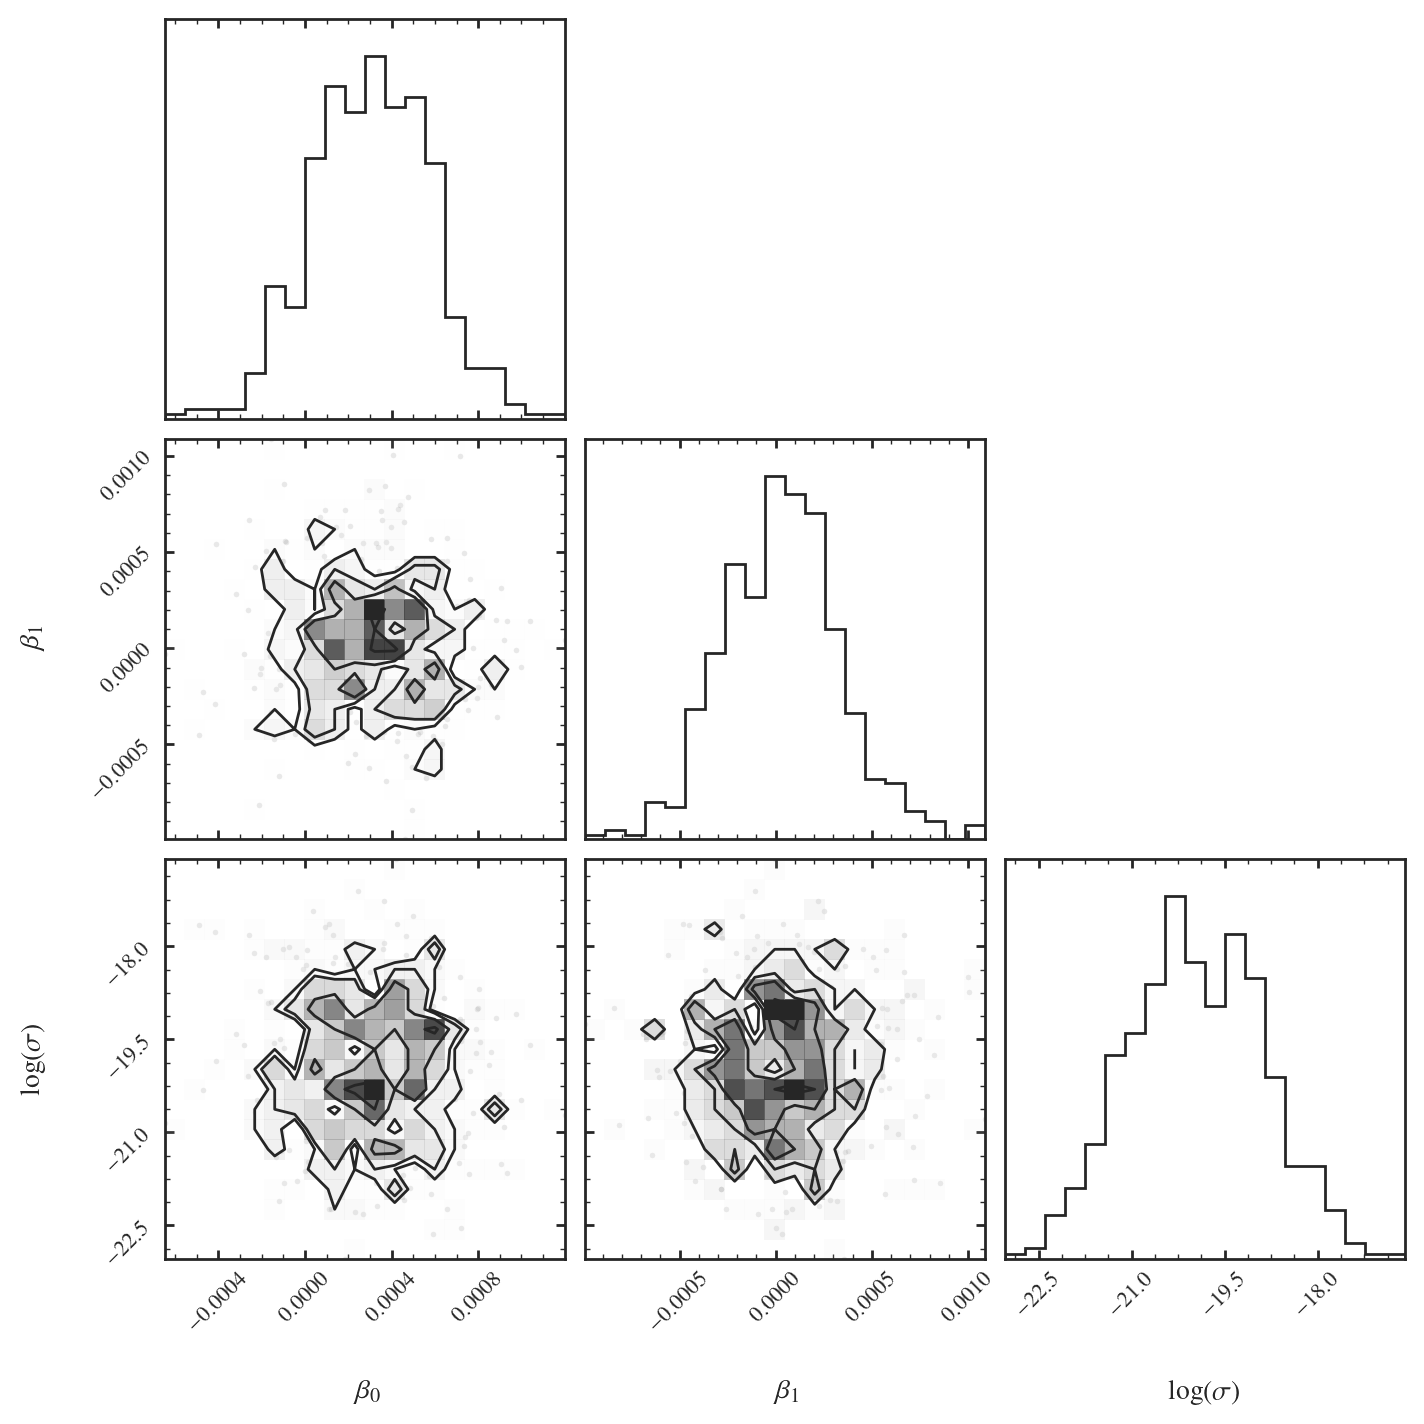

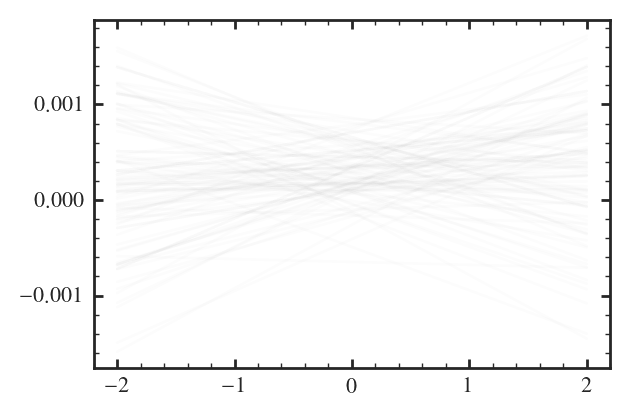

In [8]:
mcmc_utils.plot_prior(lin_model)

100%|██████████| 1000/1000 [00:14<00:00, 69.50it/s]


$\beta_0$ = -4.29e-05 + 2.96e-03 - 3.09e-03
$\beta_1$ = -1.83e-04 + 2.16e-02 - 2.07e-02
$\log(\sigma)$ = -2.01e+01 + 9.36e-01 - 9.42e-01


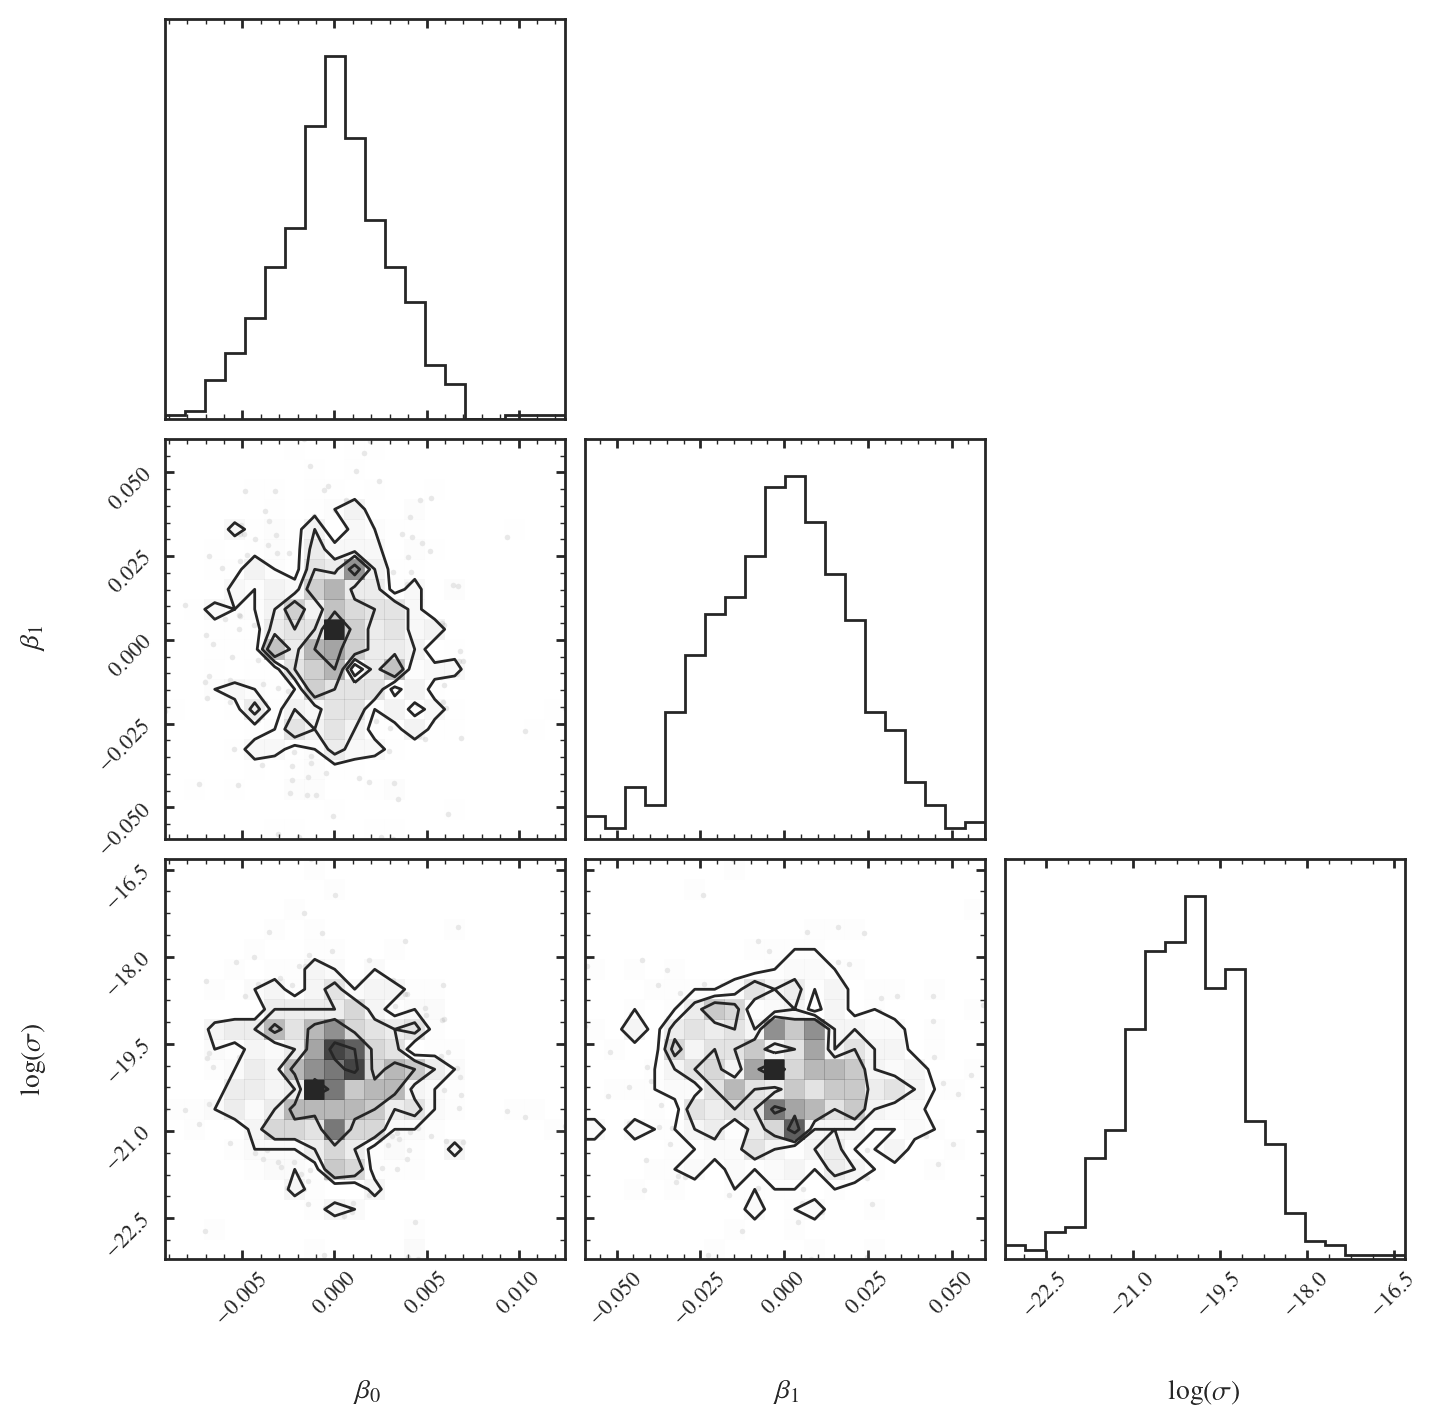

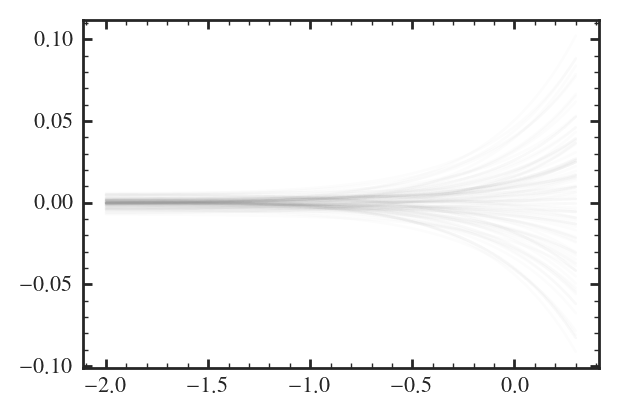

In [9]:
mcmc_utils.plot_prior(exp_model, xlims=(-2, 0.3))

100%|██████████| 1000/1000 [00:14<00:00, 69.84it/s]


$\beta_0$ = 3.63e-04 + 3.45e-04 - 2.97e-04
$\beta_1$ = -1.13e-05 + 3.02e-04 - 2.86e-04
$\beta_2$ = -1.78e-05 + 2.80e-04 - 2.90e-04
$\log(\sigma)$ = -2.00e+01 + 9.77e-01 - 1.02e+00


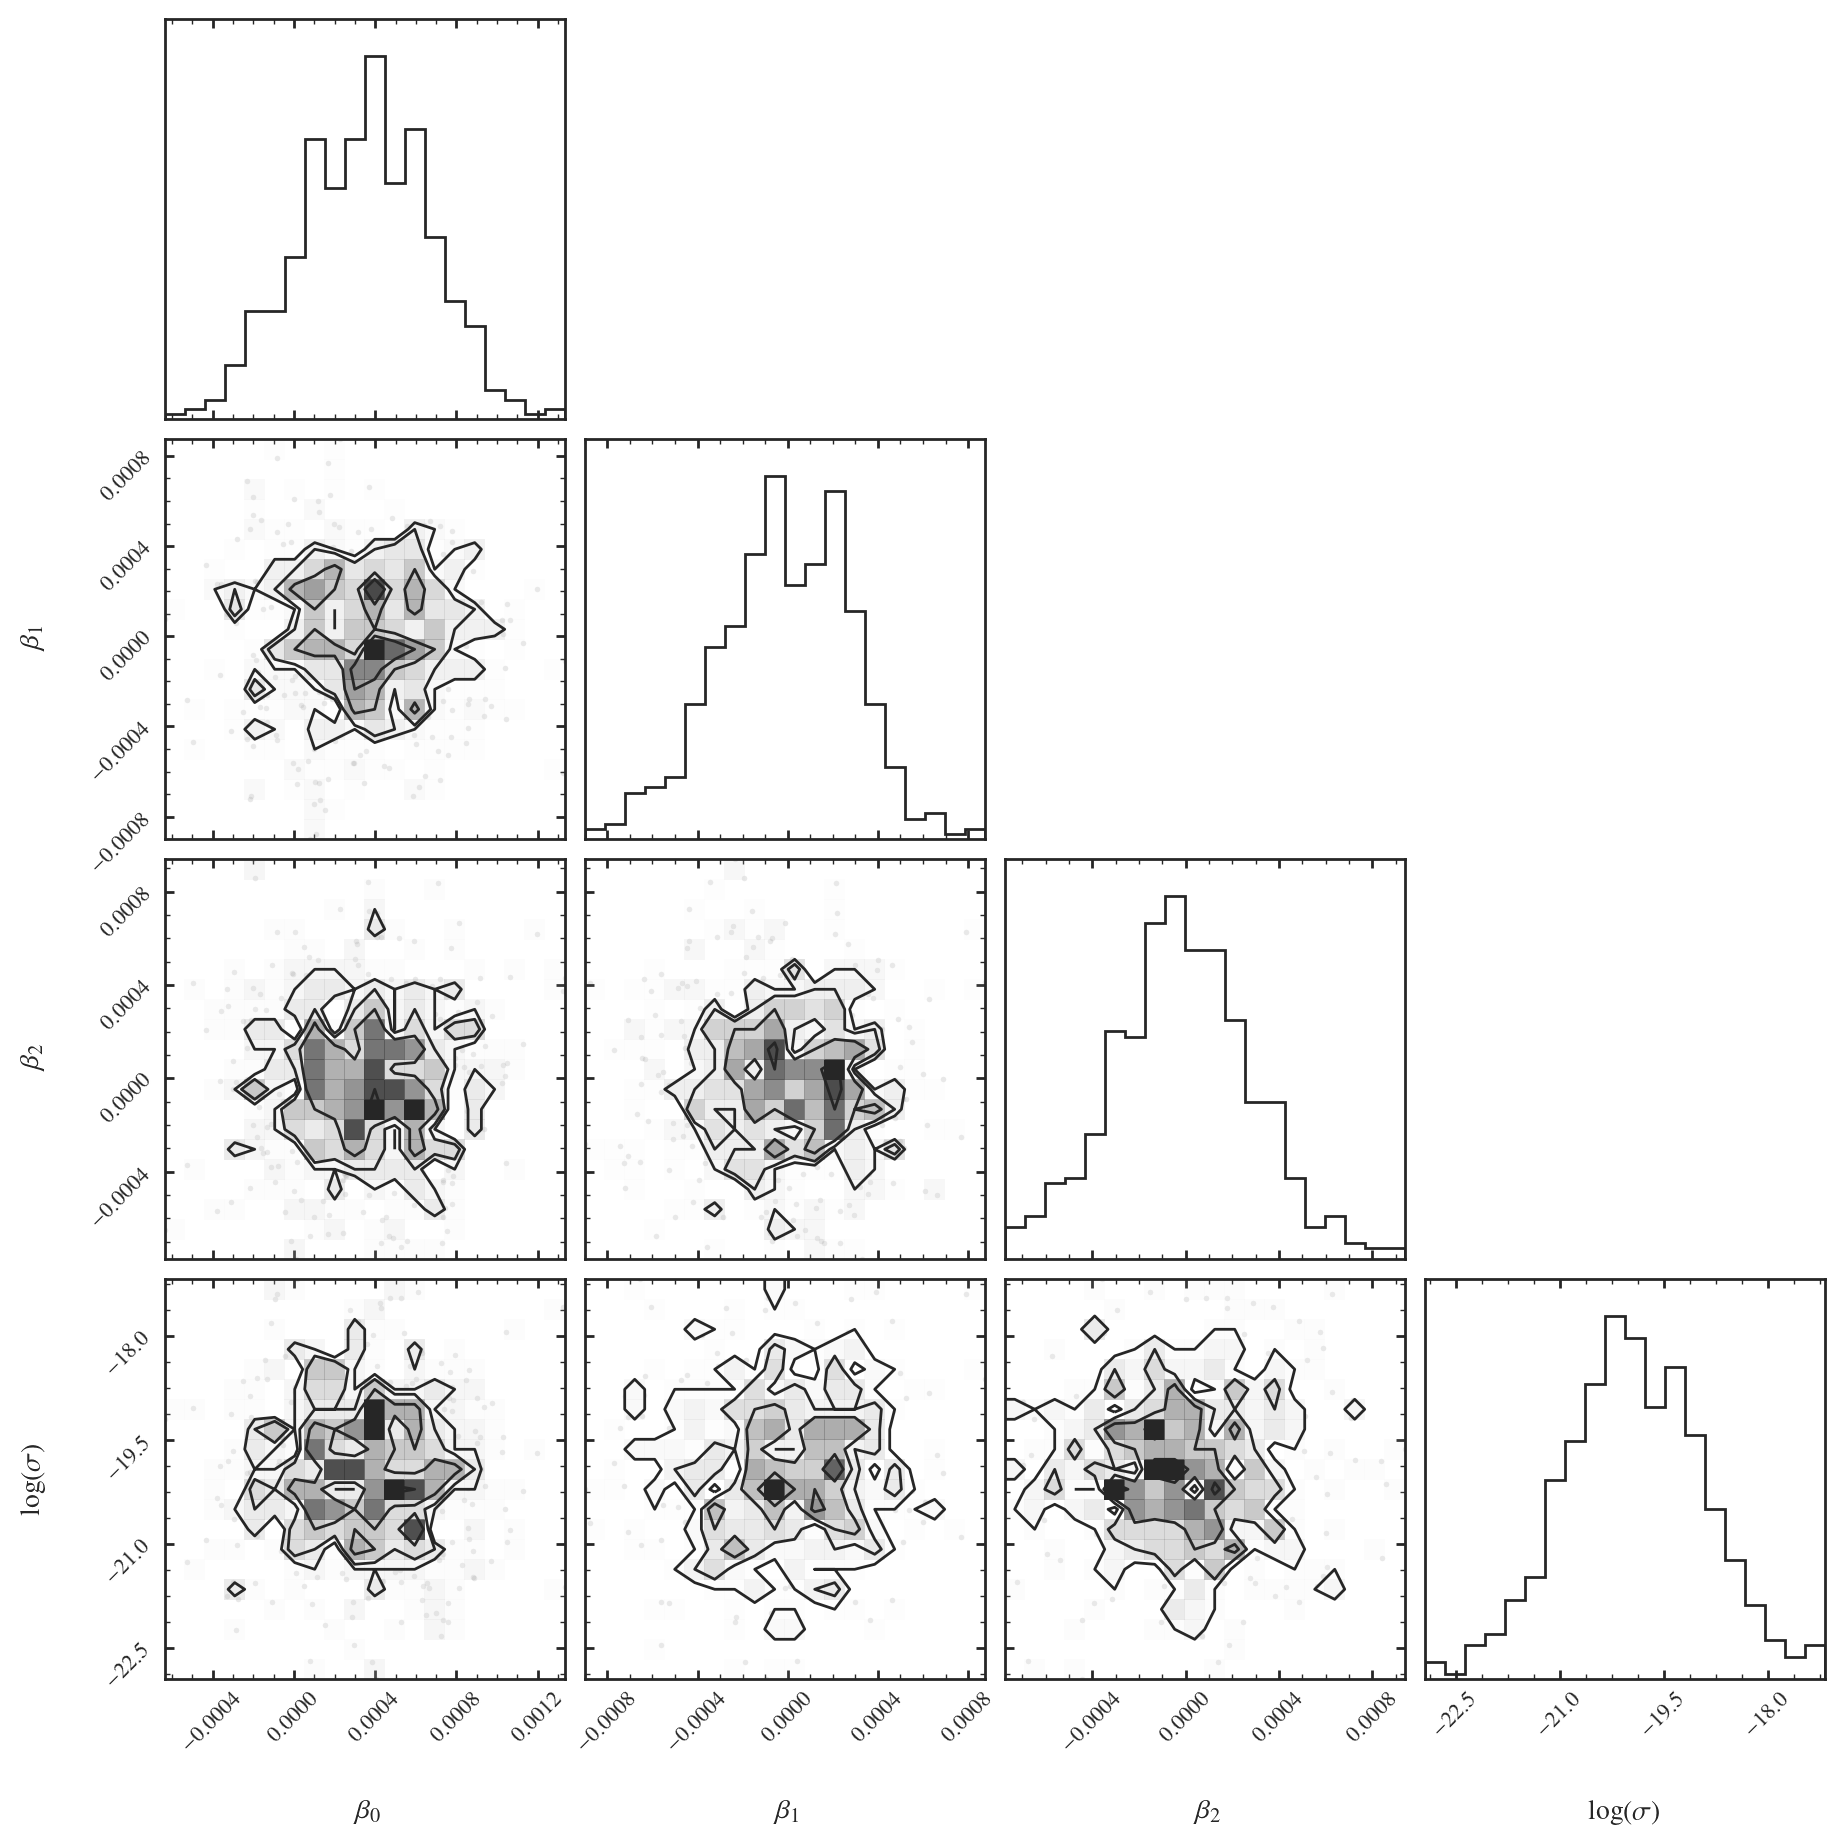

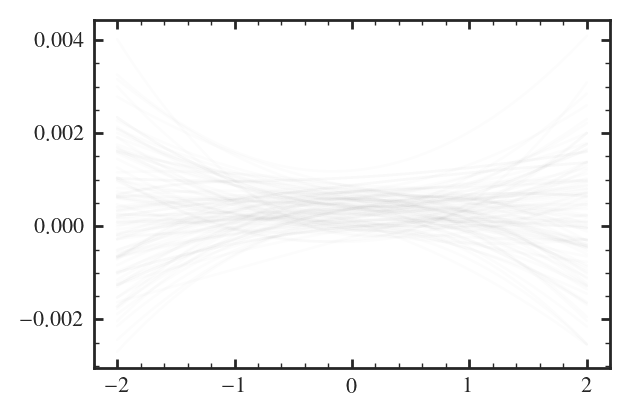

In [10]:
mcmc_utils.plot_prior(quad_model)

# Fit to the yield tables

In [11]:
def get_yield_table(study):
    y1, m1, z1 = vice.yields.agb.grid("c", study=study)
    mh1 = Z_to_MH(z1)
    vice.yields.agb.settings["c"] = vice.yields.agb.interpolator("c", study=study)
    y_c_agb1 = np.array([calc_y(z) for z in z1])

    return mh1, y_c_agb1, None, None

In [12]:
obs = get_yield_table("cristallo11")

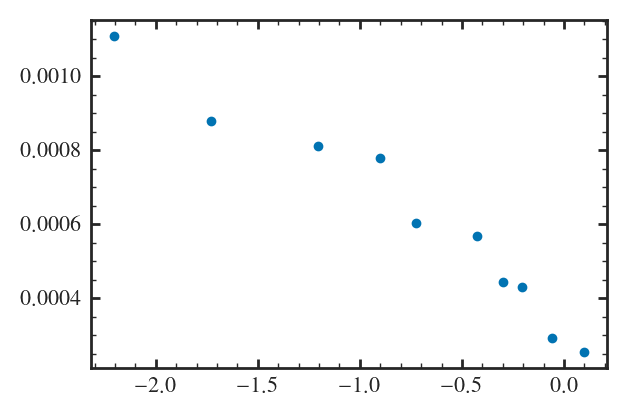

In [13]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:12<00:00, 234.30it/s]


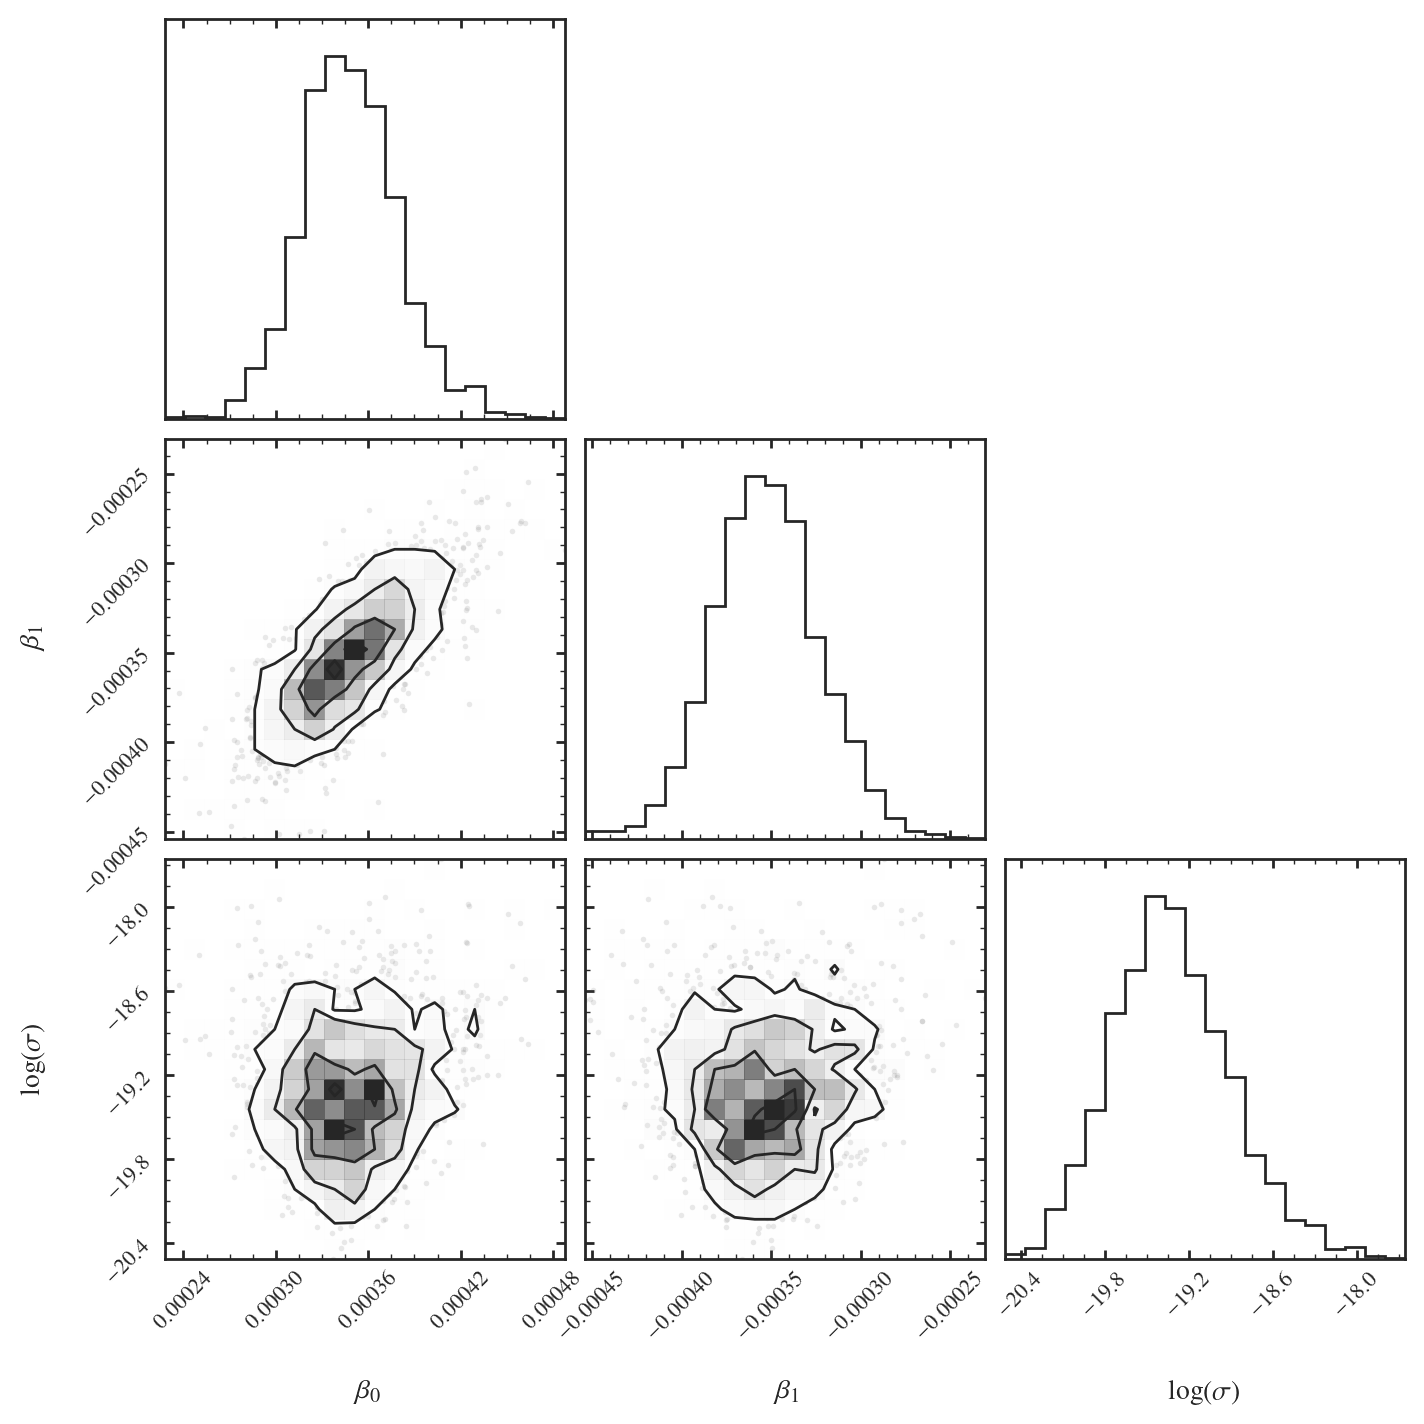

In [14]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 3.47e-04 + 2.83e-05 - 3.08e-05
$\beta_1$ = -3.53e-04 + 2.75e-05 - 3.01e-05
$\log(\sigma)$ = -1.93e+01 + 3.91e-01 - 4.35e-01


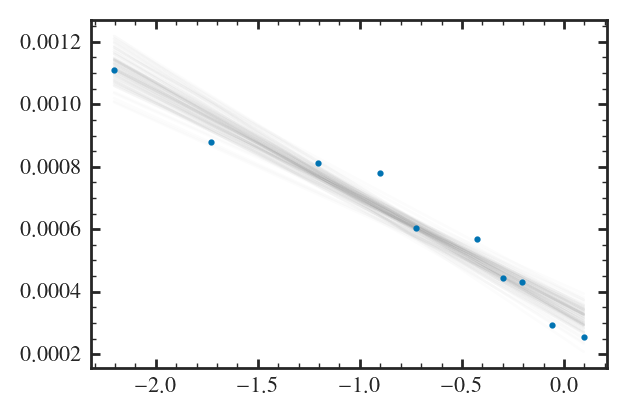

In [15]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:16<00:00, 186.93it/s]


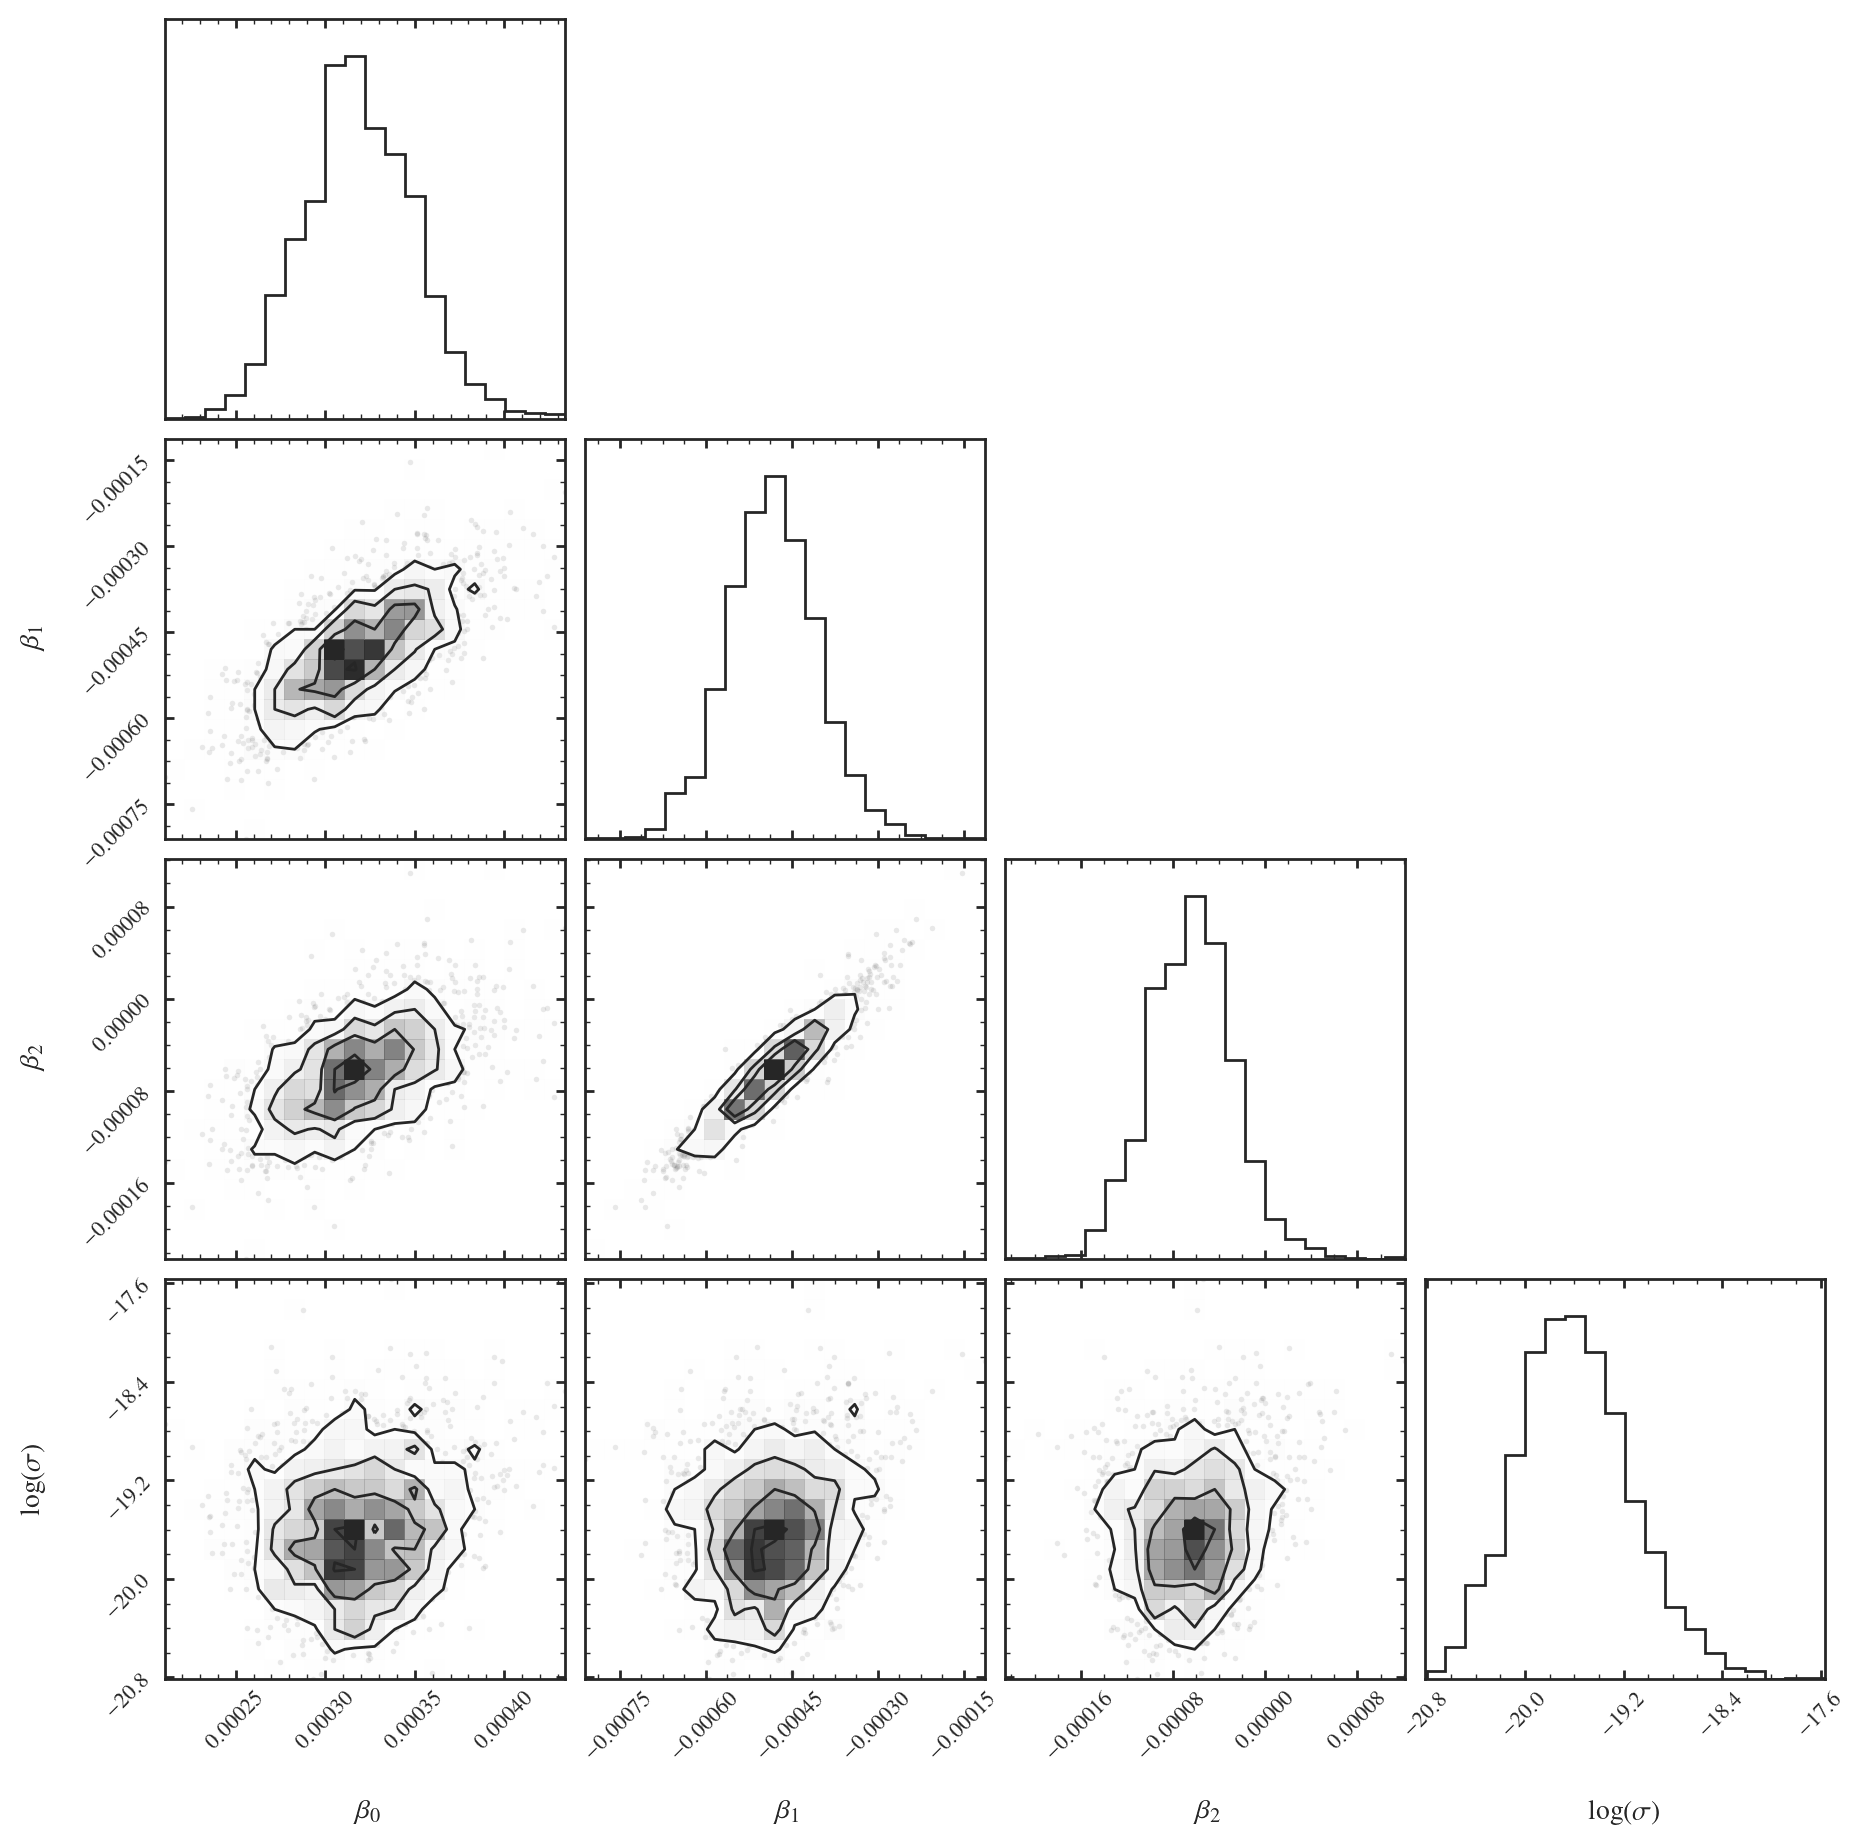

In [16]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 3.17e-04 + 2.92e-05 - 3.22e-05
$\beta_1$ = -4.85e-04 + 7.60e-05 - 7.60e-05
$\beta_2$ = -6.40e-05 + 3.54e-05 - 3.55e-05
$\log(\sigma)$ = -1.96e+01 + 4.36e-01 - 4.78e-01


(-0.0003, 0.002)

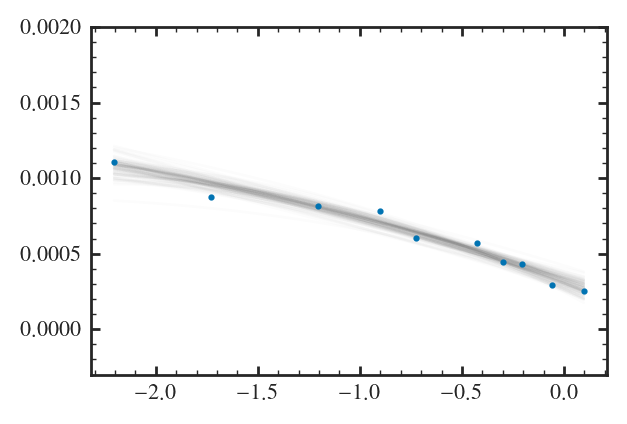

In [17]:
mcmc_utils.plot_posterior(quad_model, obs, samples)
plt.ylim(-0.3e-3, 2e-3)

100%|██████████| 3000/3000 [00:13<00:00, 221.90it/s]


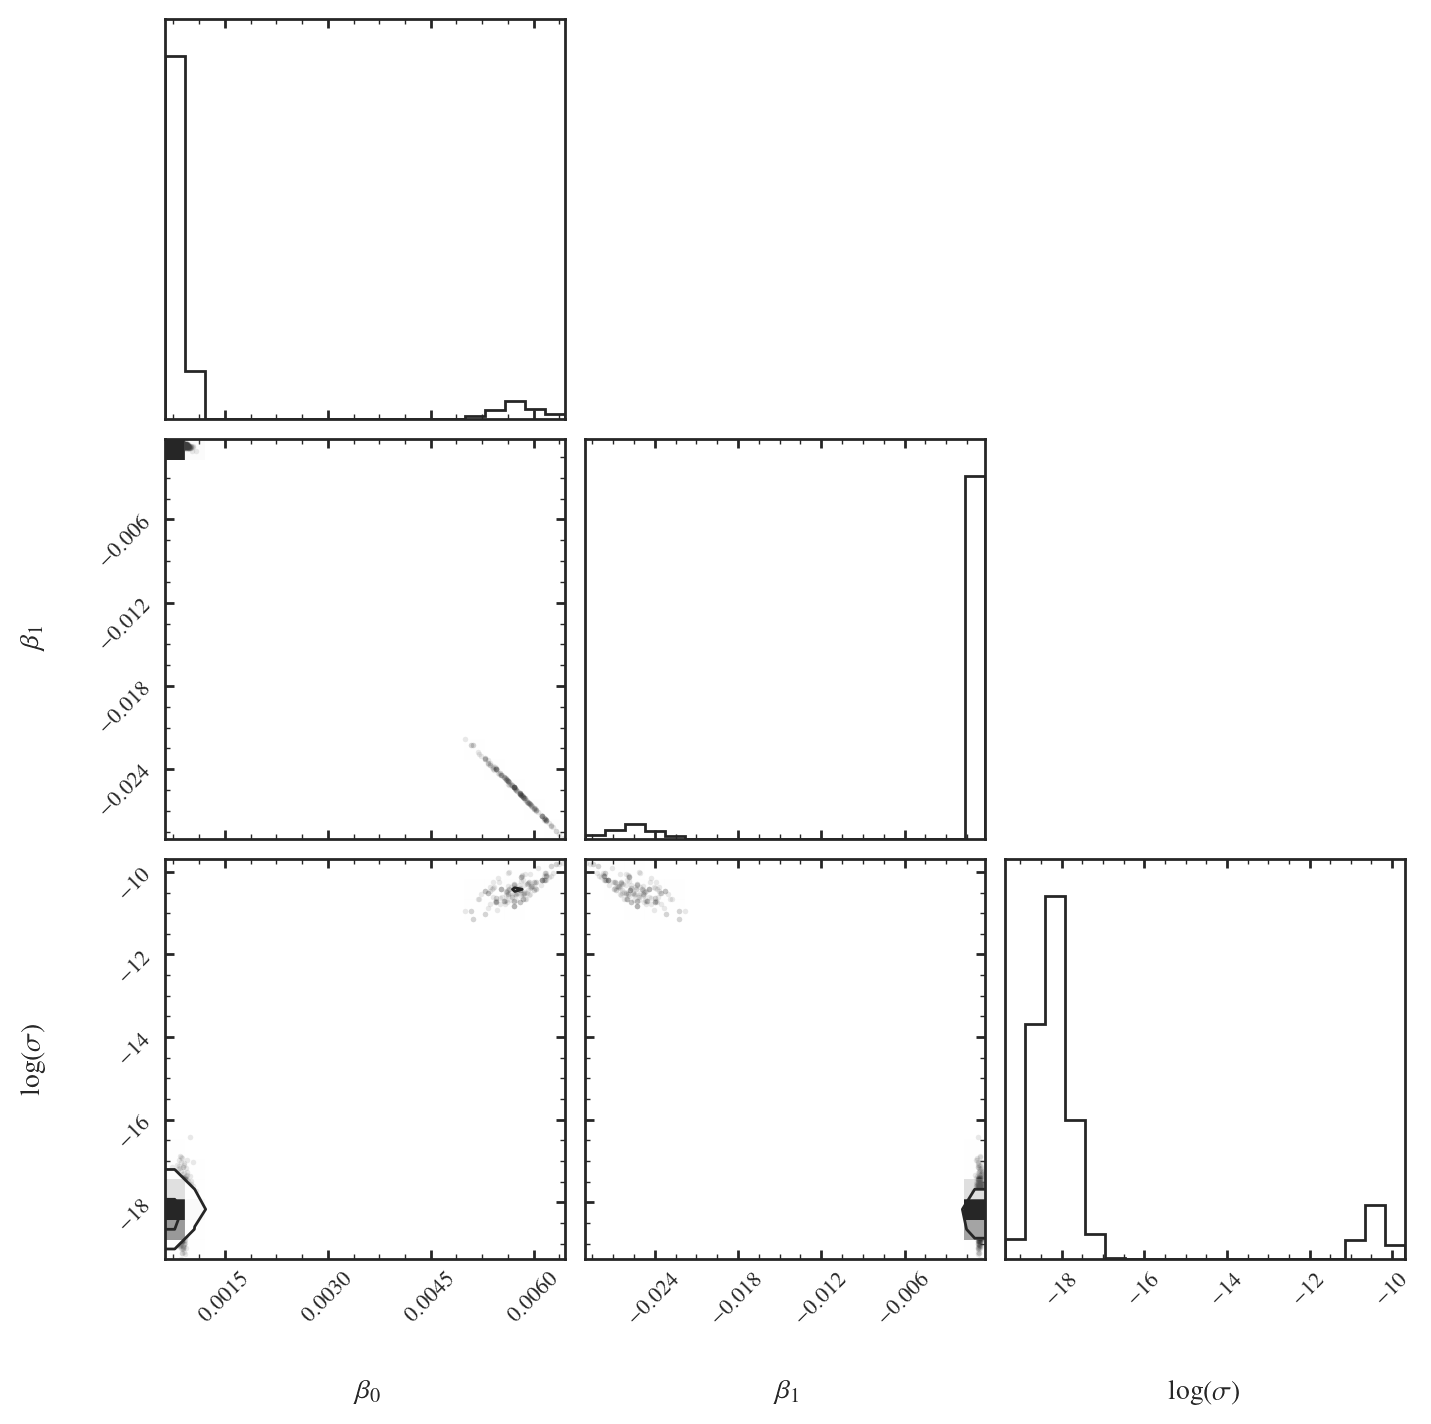

In [18]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 8.63e-04 + 5.33e-05 - 6.78e-05
$\beta_1$ = -6.11e-04 + 1.23e-04 - 8.84e-05
$\log(\sigma)$ = -1.82e+01 + 4.12e-01 - 5.94e-01


(-0.001, 0.002)

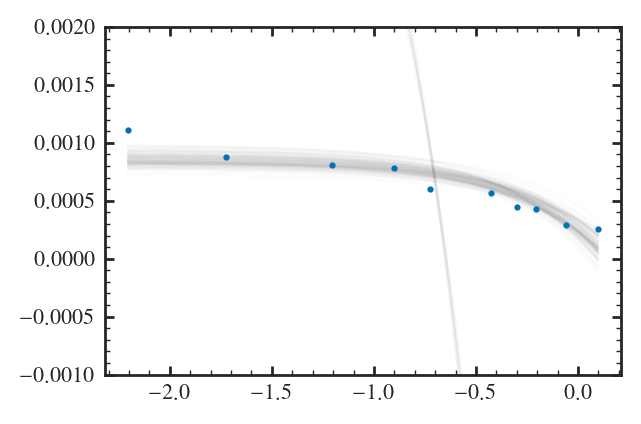

In [19]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# V13

In [20]:
obs = get_yield_table("ventura13")

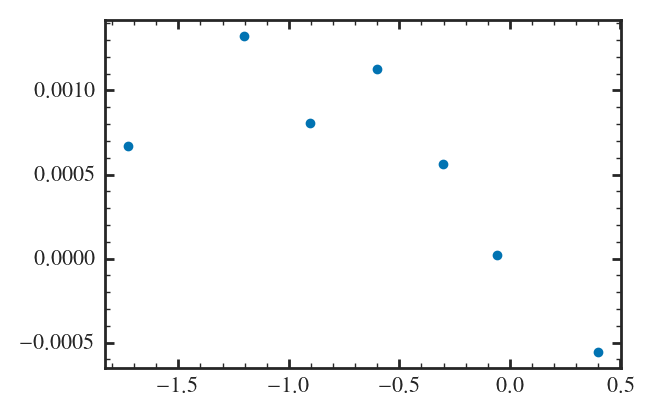

In [21]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:13<00:00, 228.31it/s]


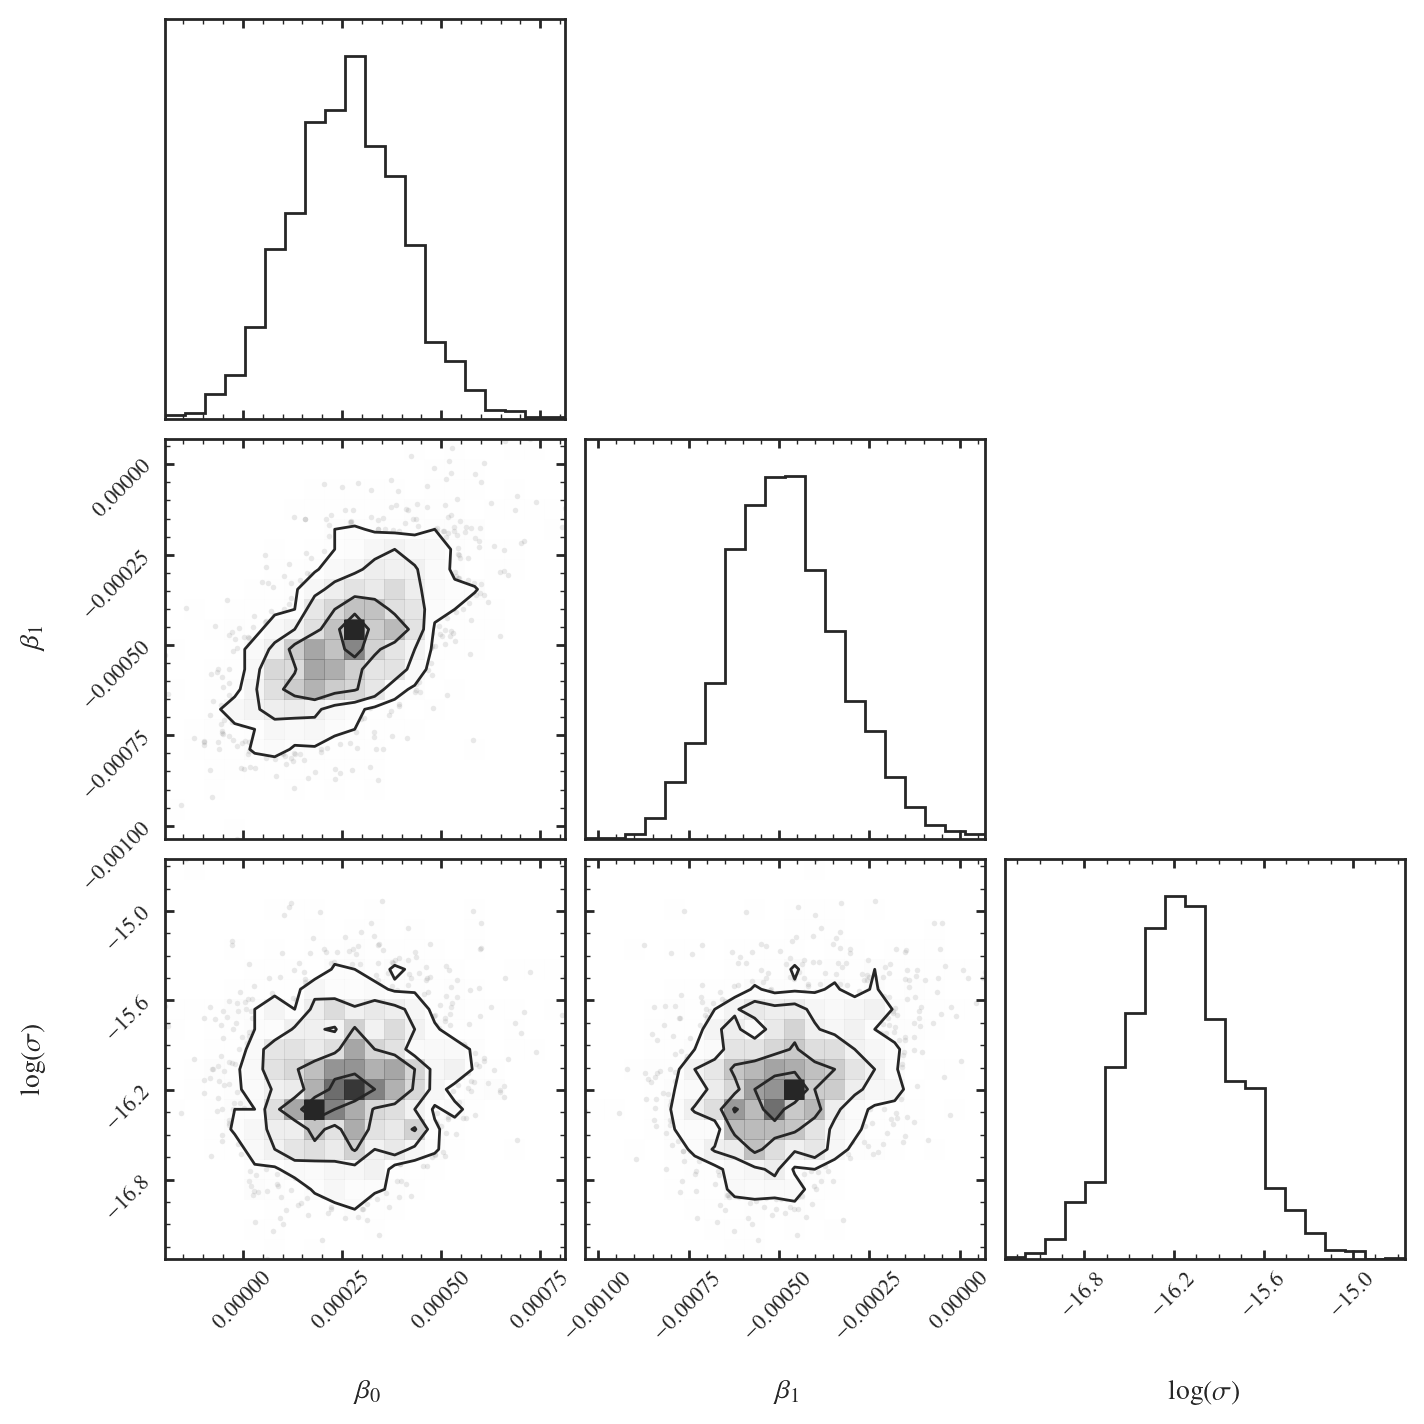

In [22]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 2.62e-04 + 1.46e-04 - 1.37e-04
$\beta_1$ = -4.94e-04 + 1.44e-04 - 1.66e-04
$\log(\sigma)$ = -1.62e+01 + 3.42e-01 - 3.94e-01


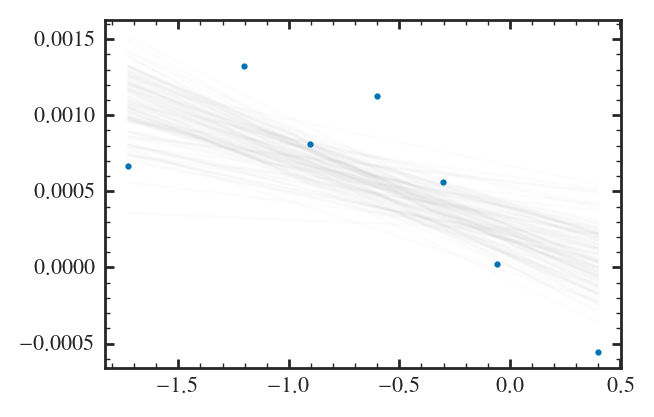

In [23]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:16<00:00, 177.02it/s]


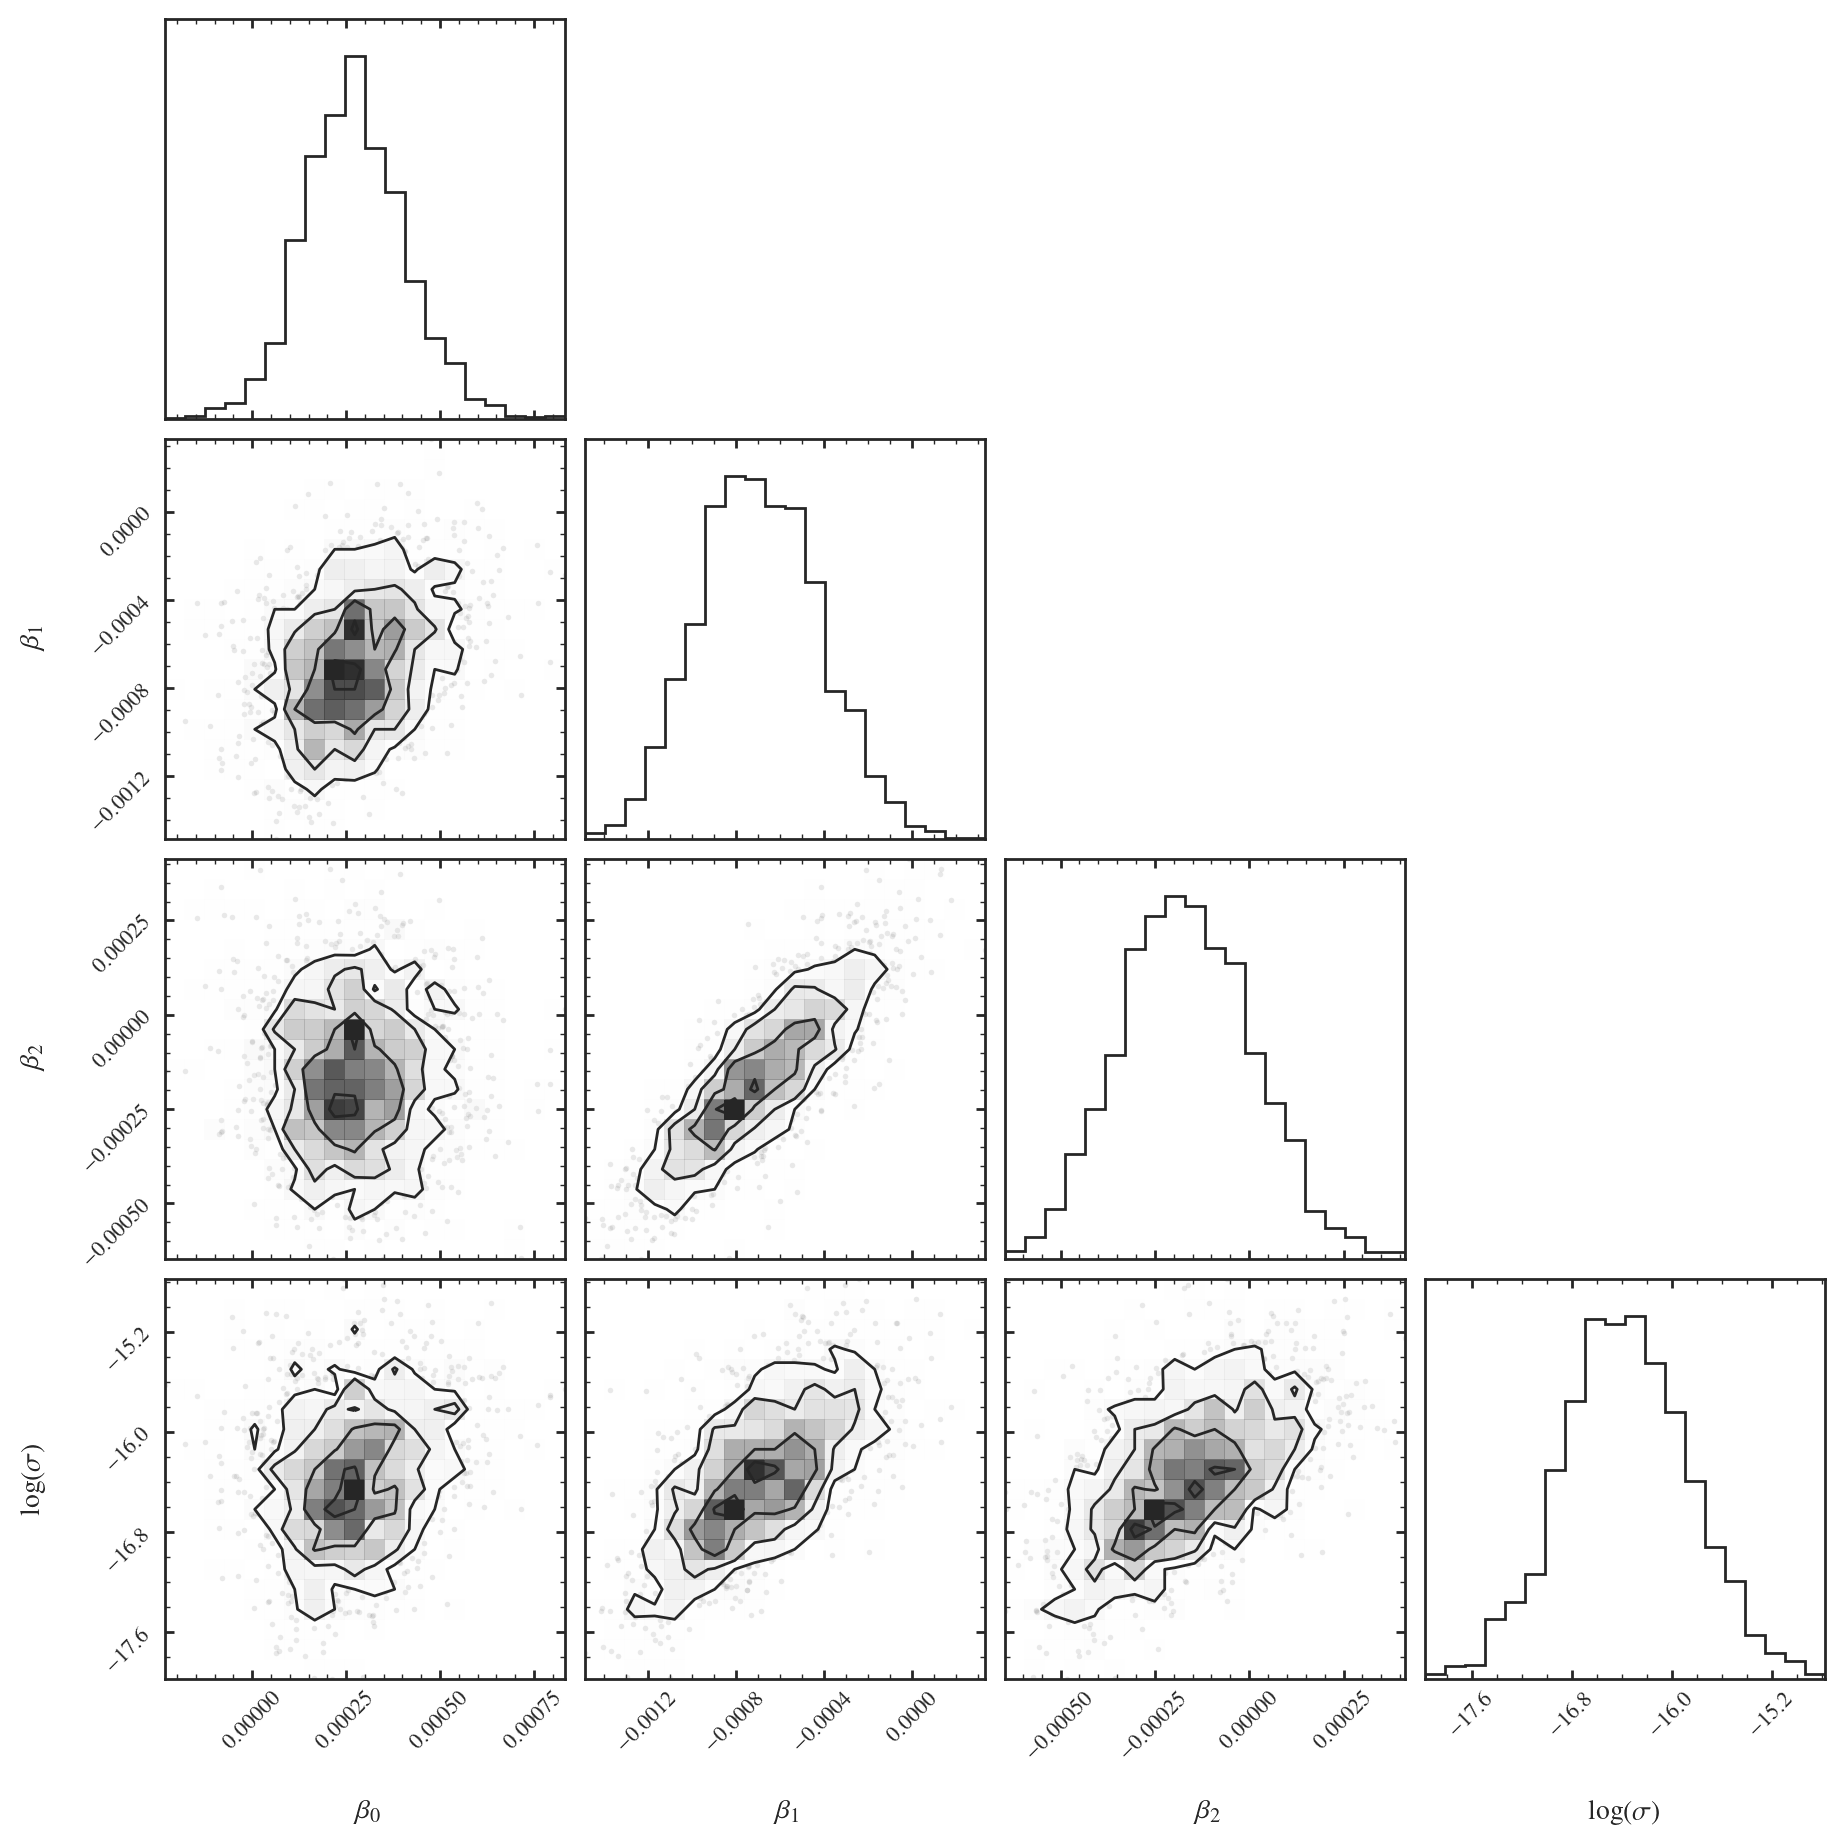

In [24]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 2.67e-04 + 1.26e-04 - 1.35e-04
$\beta_1$ = -7.06e-04 + 2.56e-04 - 2.89e-04
$\beta_2$ = -1.71e-04 + 1.70e-04 - 1.84e-04
$\log(\sigma)$ = -1.64e+01 + 4.84e-01 - 5.19e-01


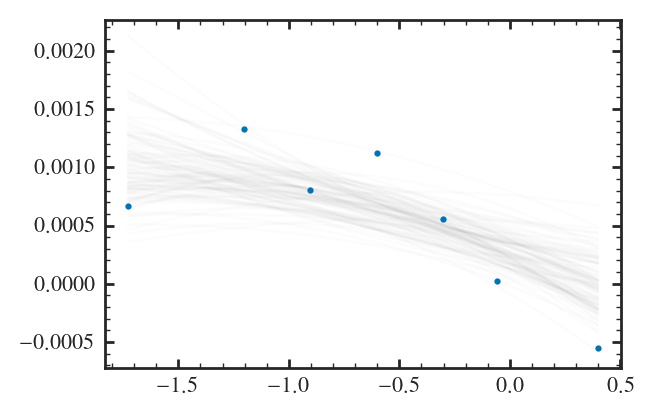

In [25]:
mcmc_utils.plot_posterior(quad_model, obs, samples)

100%|██████████| 3000/3000 [00:13<00:00, 226.65it/s]


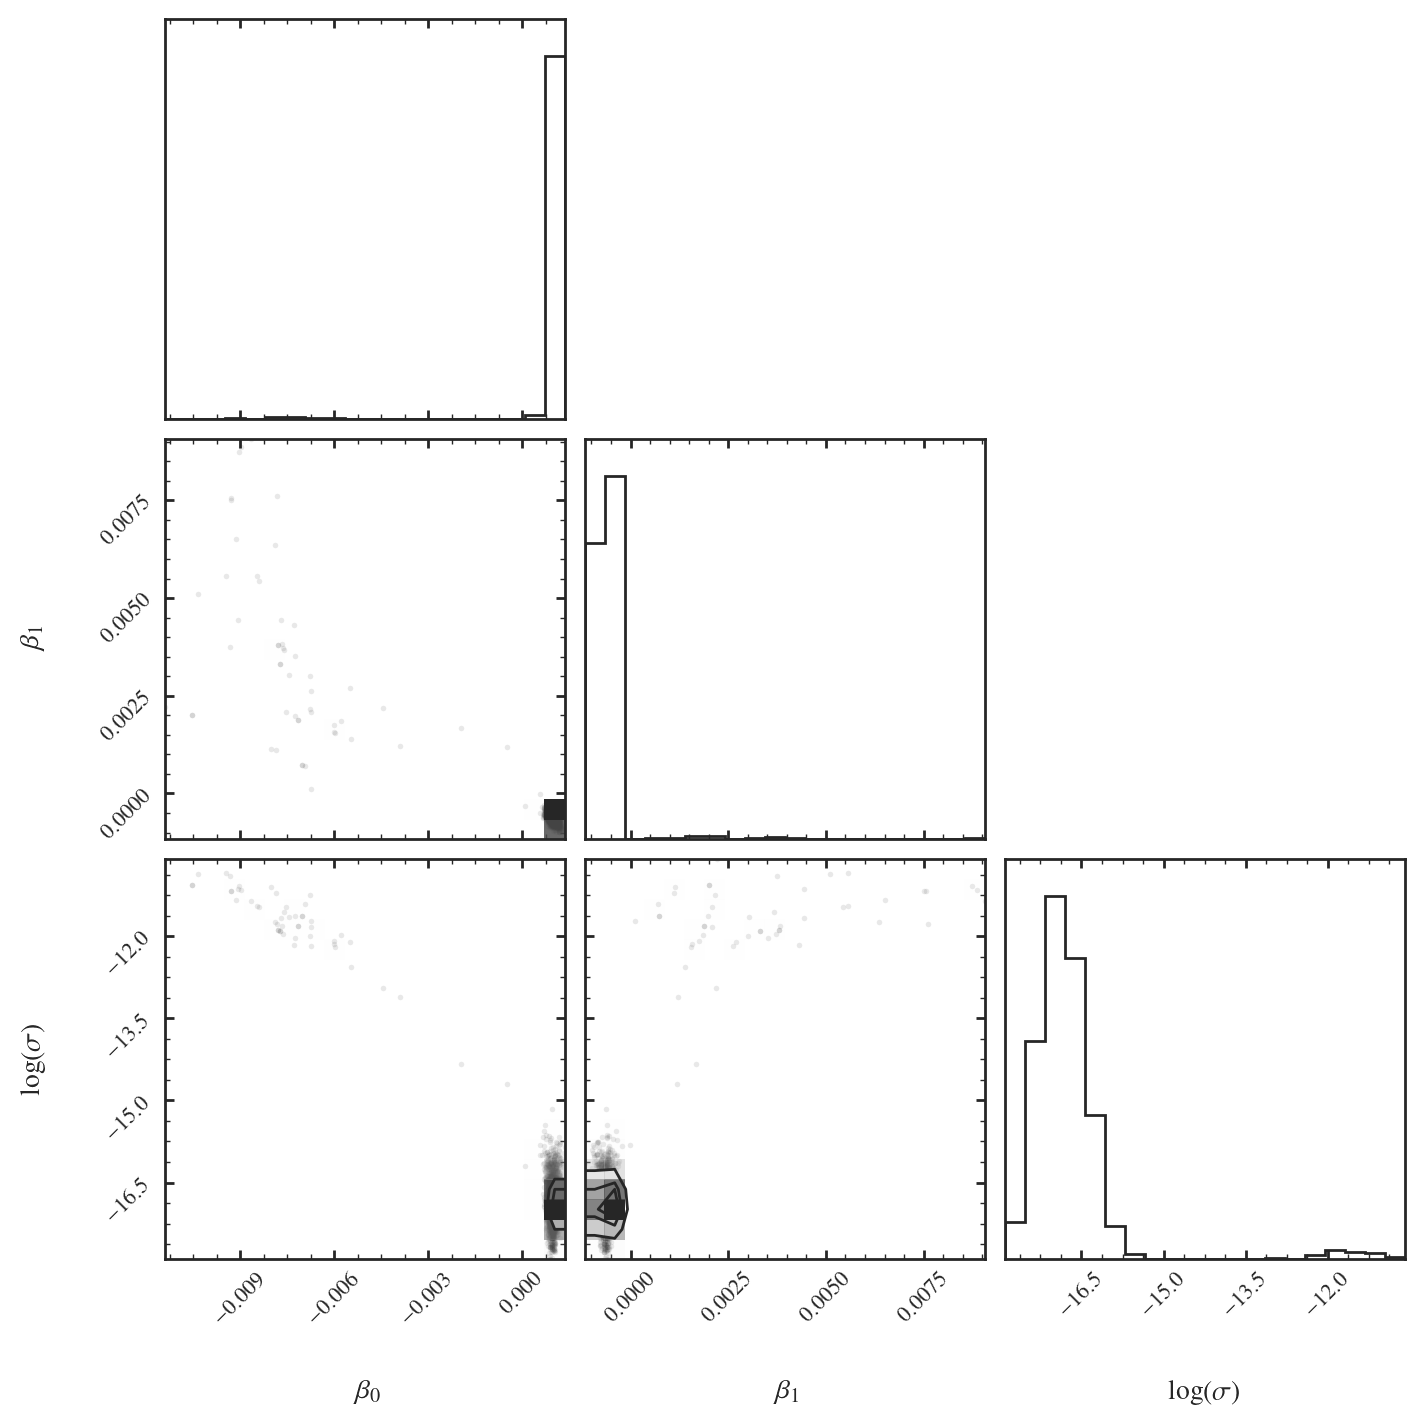

In [26]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 9.60e-04 + 1.10e-04 - 1.08e-04
$\beta_1$ = -6.44e-04 + 1.08e-04 - 1.05e-04
$\log(\sigma)$ = -1.69e+01 + 3.92e-01 - 4.73e-01


(-0.001, 0.002)

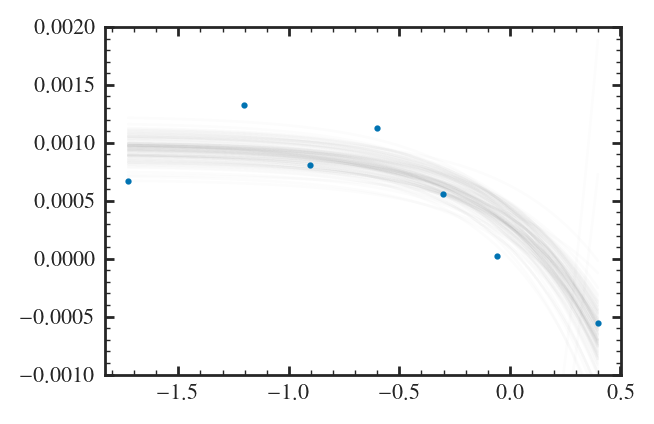

In [27]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# K16

In [28]:
obs = get_yield_table("karakas16")

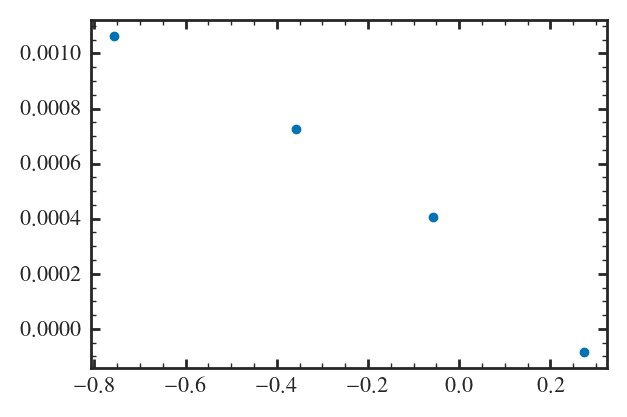

In [29]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:13<00:00, 228.97it/s]


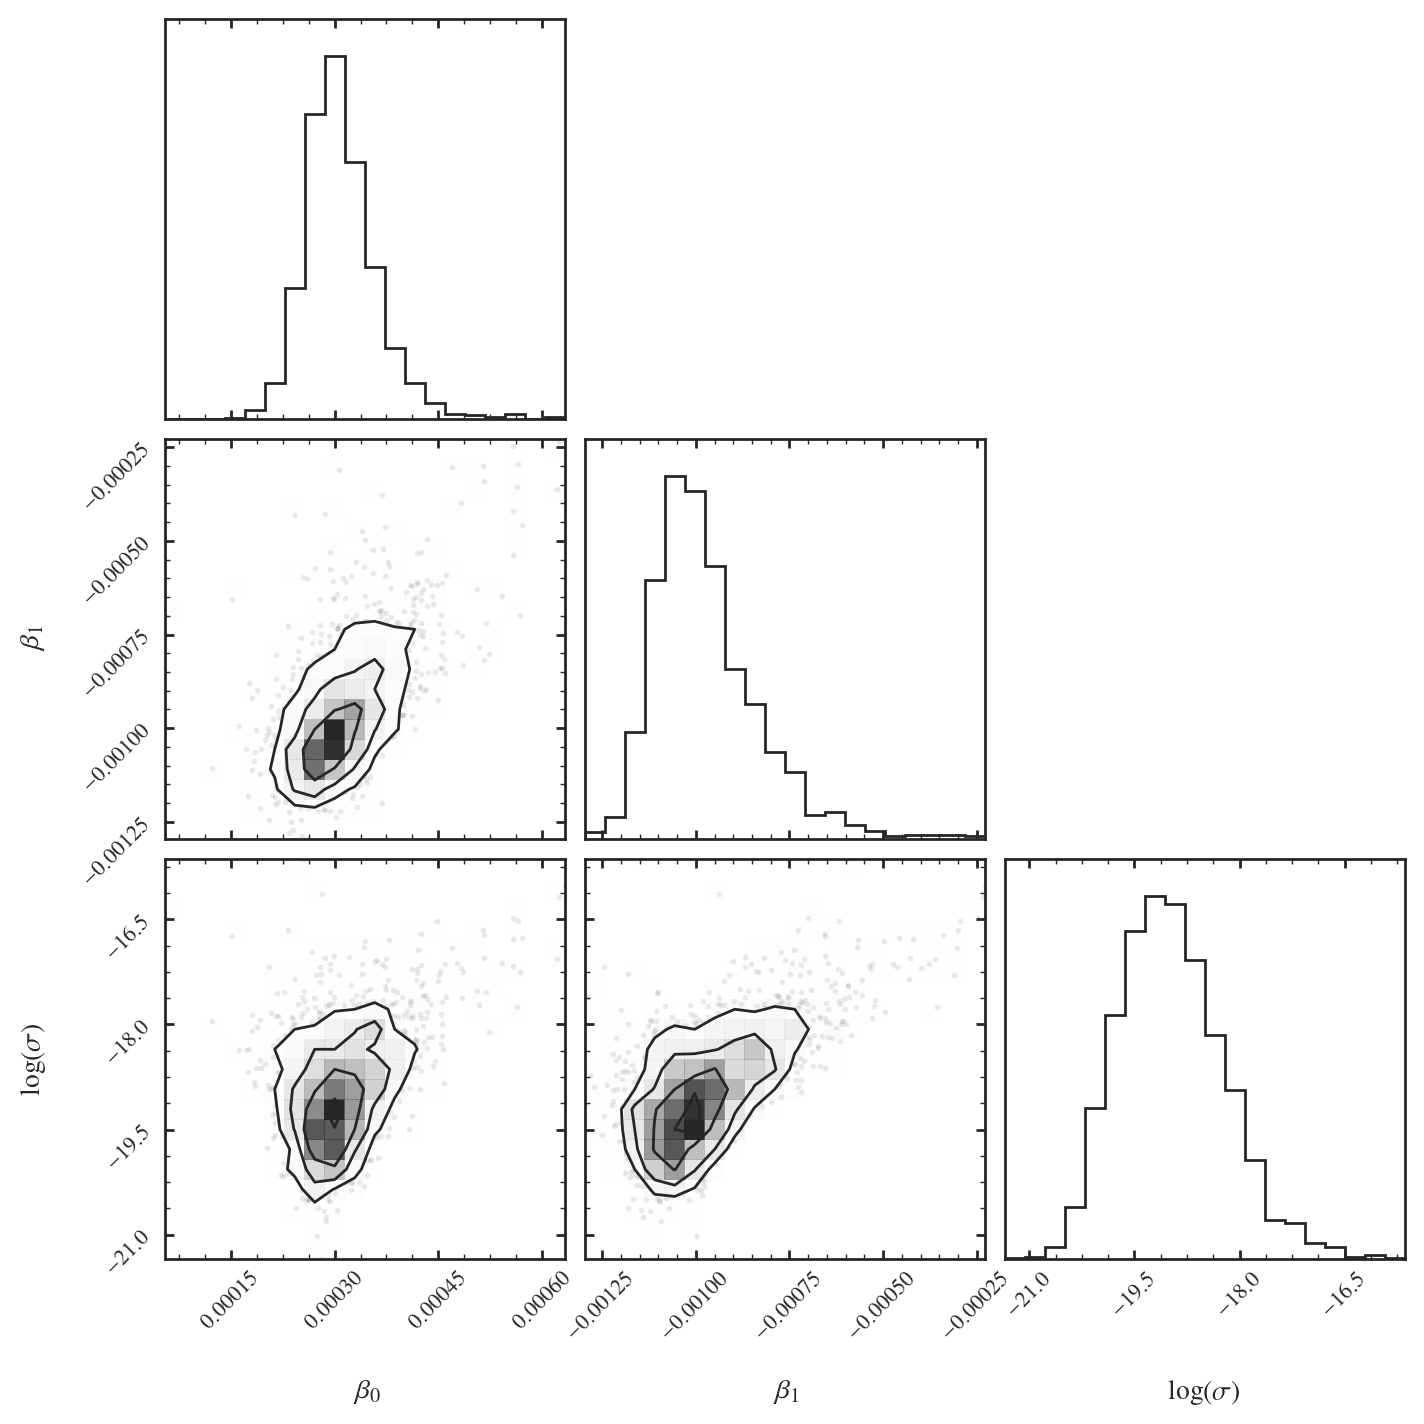

In [30]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 3.03e-04 + 4.00e-05 - 5.29e-05
$\beta_1$ = -1.00e-03 + 9.75e-05 - 1.58e-04
$\log(\sigma)$ = -1.90e+01 + 6.92e-01 - 7.90e-01


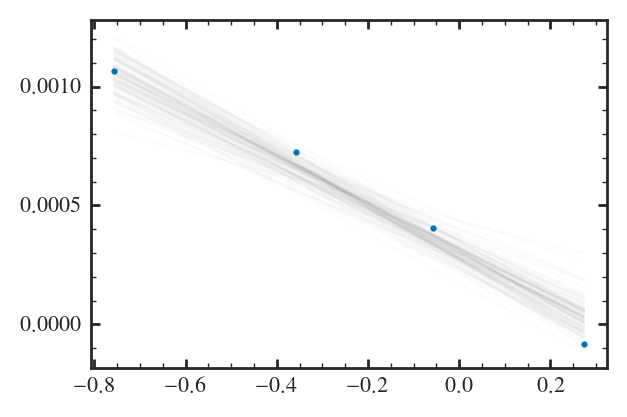

In [31]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:16<00:00, 181.41it/s]


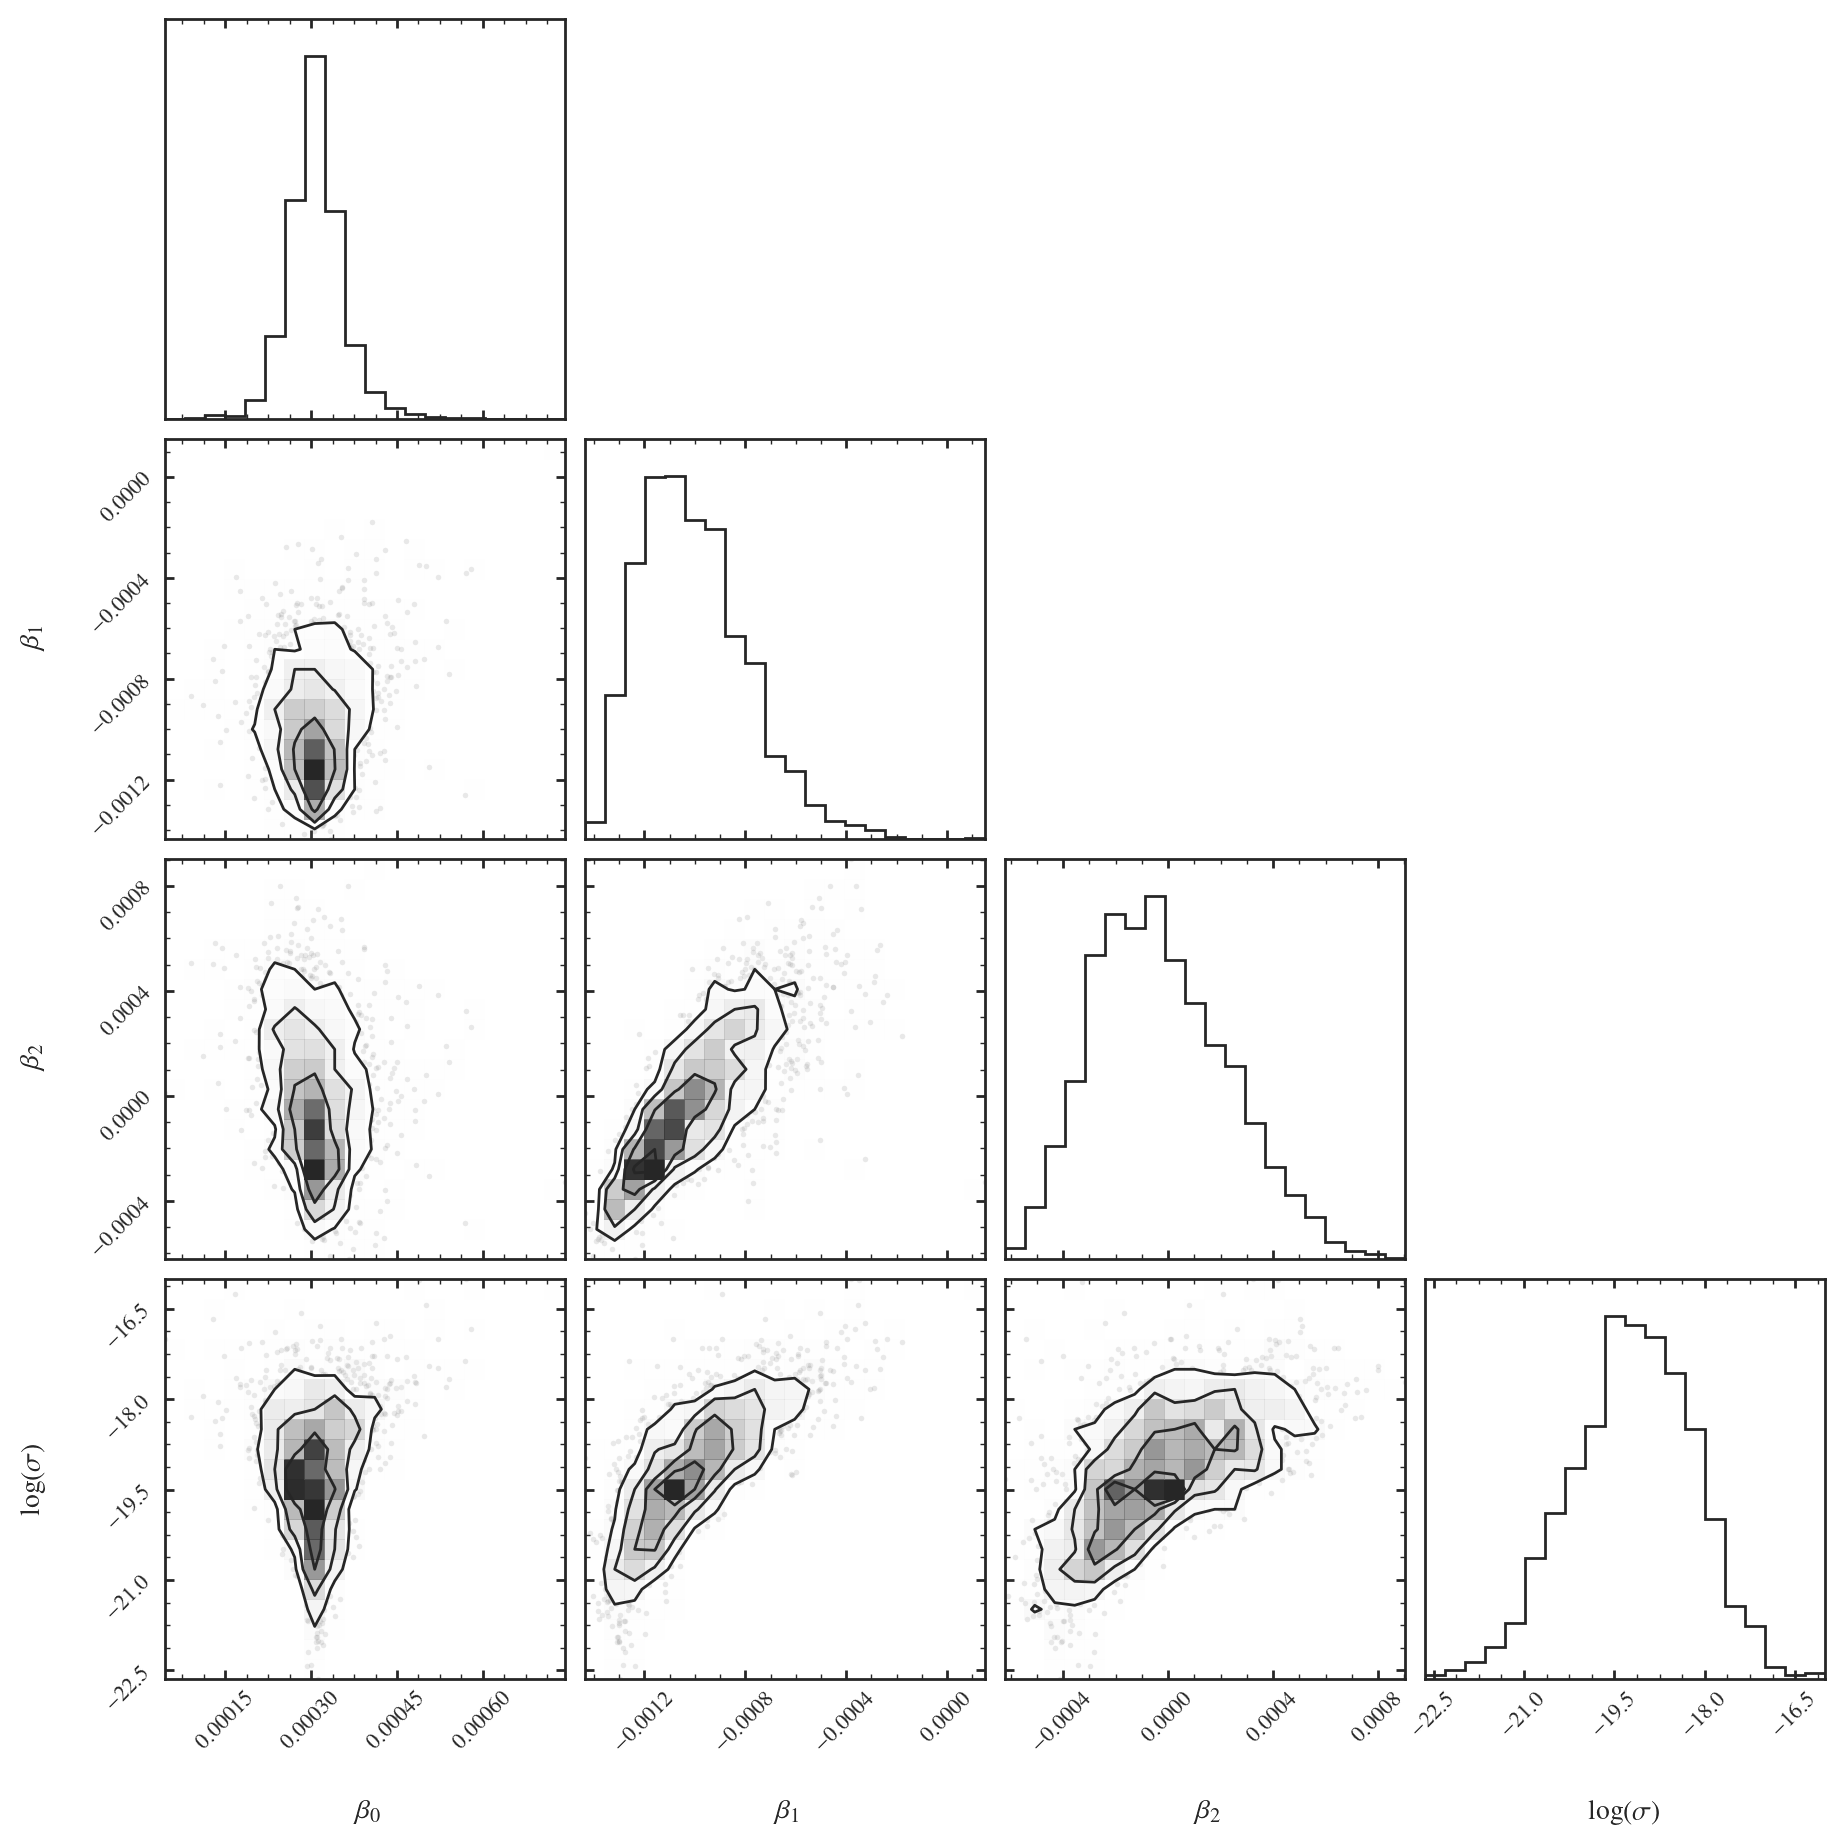

In [32]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 3.08e-04 + 4.42e-05 - 4.07e-05
$\beta_1$ = -1.03e-03 + 1.79e-04 - 2.38e-04
$\beta_2$ = -4.98e-05 + 2.32e-04 - 2.93e-04
$\log(\sigma)$ = -1.92e+01 + 1.11e+00 - 9.74e-01


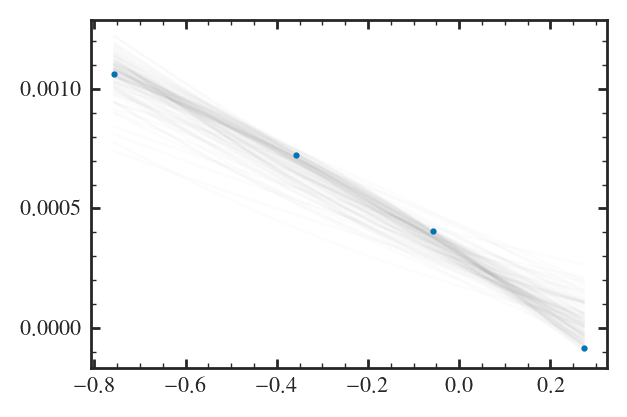

In [33]:
mcmc_utils.plot_posterior(quad_model, obs, samples)

100%|██████████| 3000/3000 [00:13<00:00, 222.82it/s]


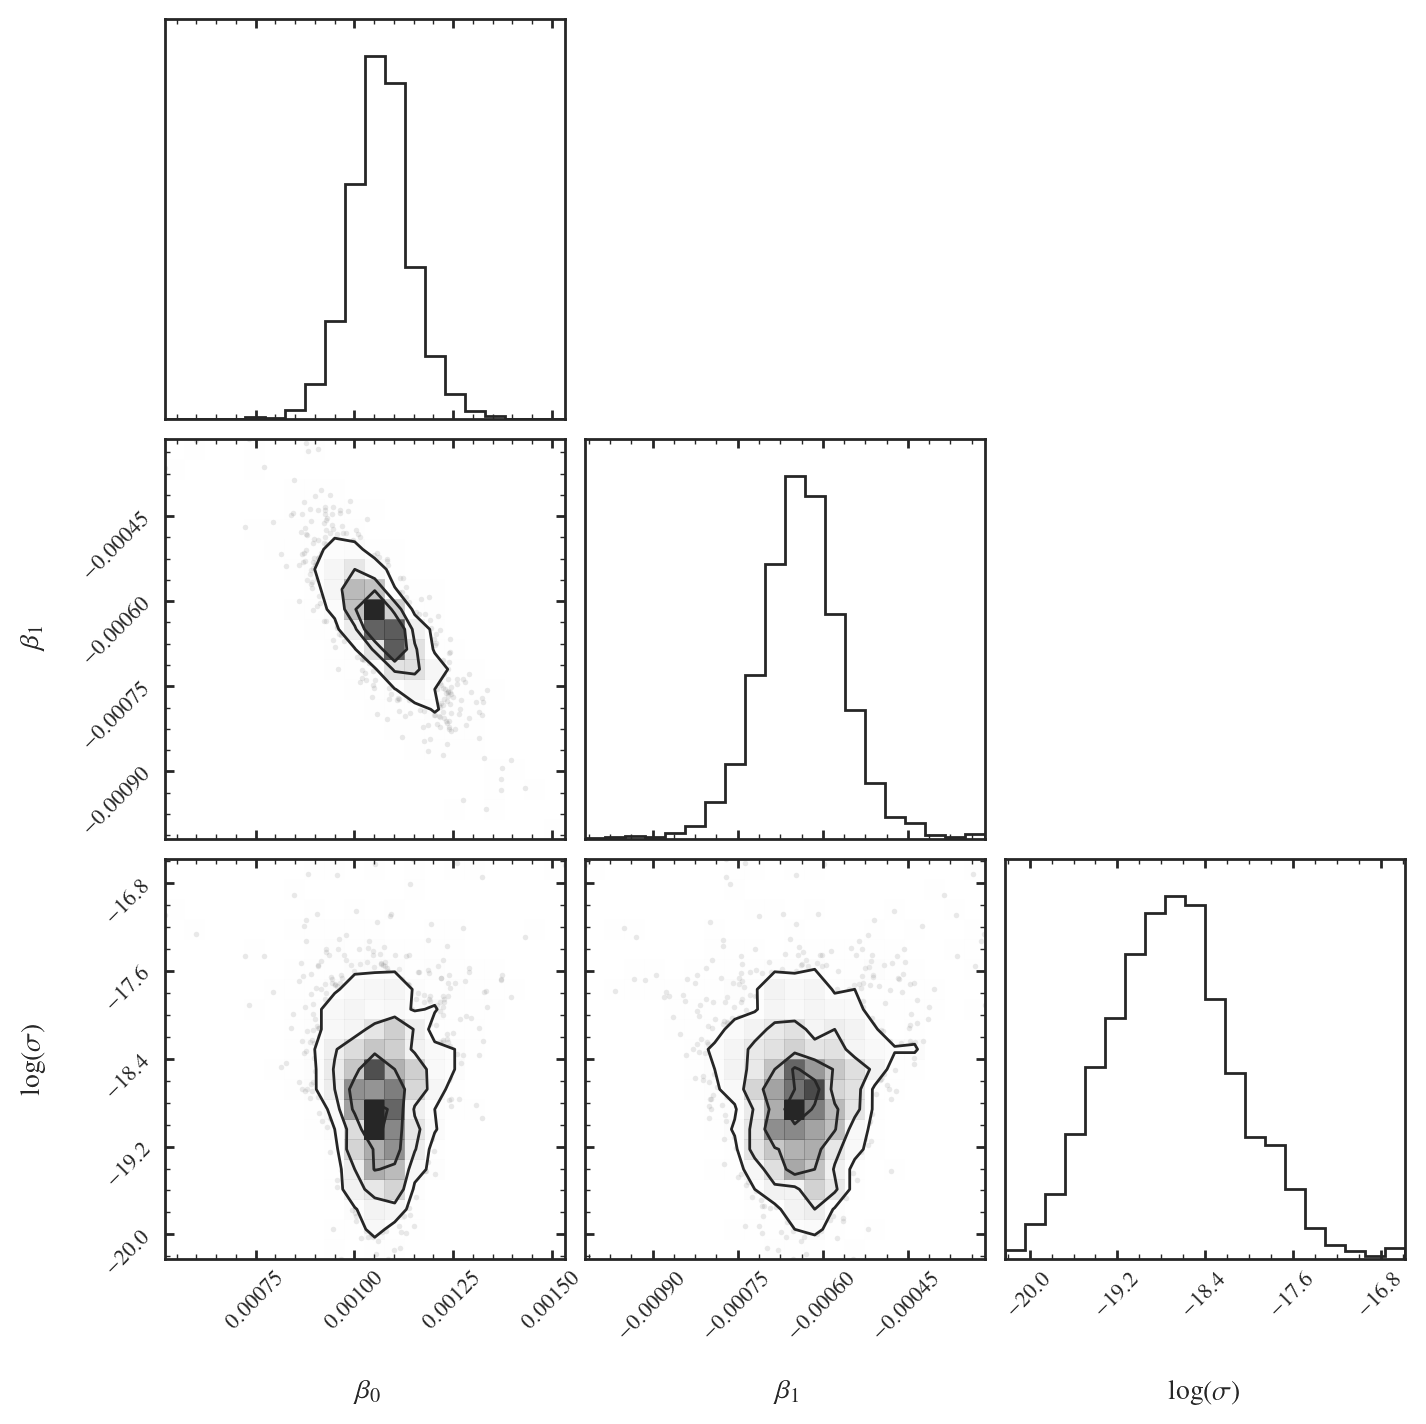

In [34]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 1.07e-03 + 7.13e-05 - 7.22e-05
$\beta_1$ = -6.39e-04 + 6.62e-05 - 6.72e-05
$\log(\sigma)$ = -1.87e+01 + 5.75e-01 - 5.97e-01


(-0.001, 0.002)

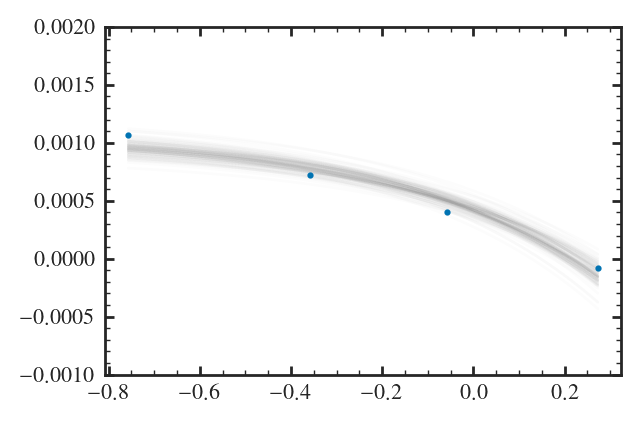

In [35]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# P16

In [36]:
obs = get_yield_table("pignatari16")

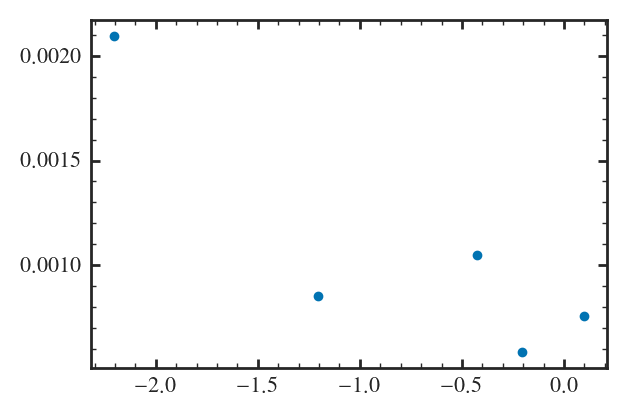

In [37]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:13<00:00, 227.94it/s]


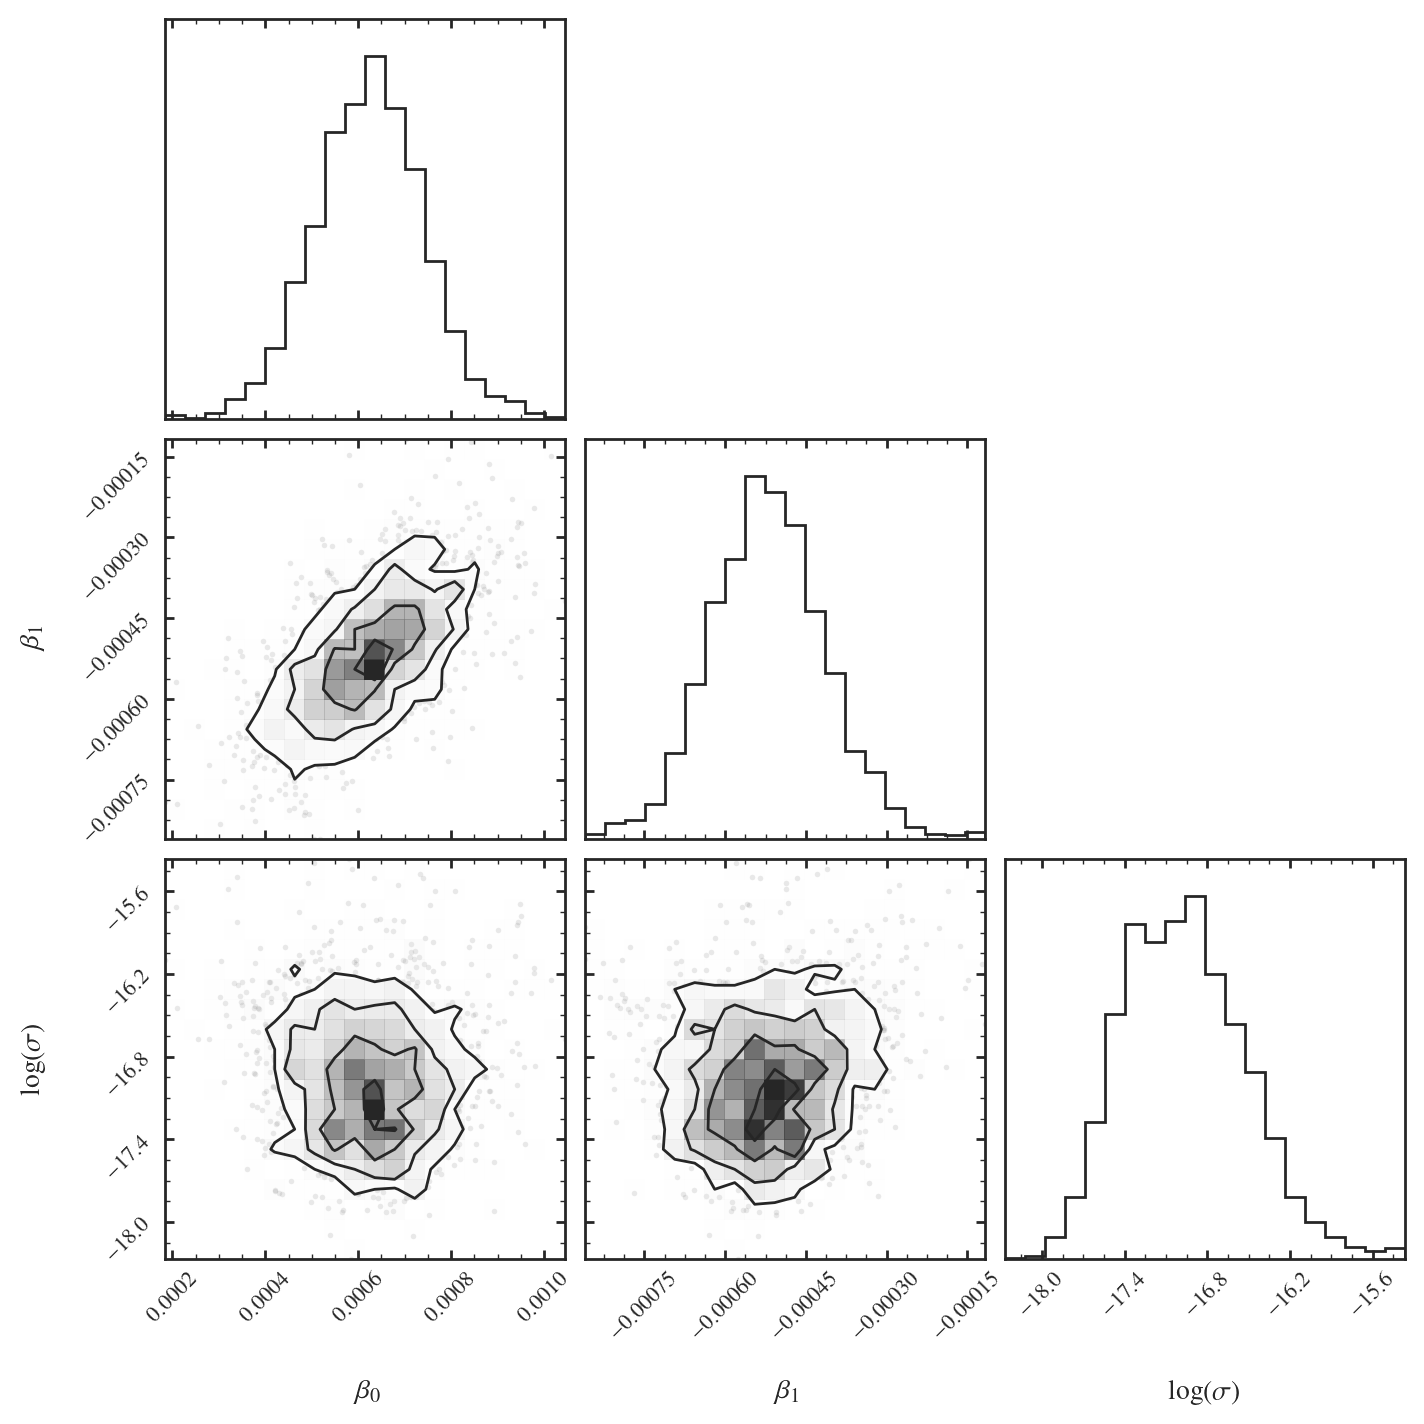

In [38]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 6.25e-04 + 1.15e-04 - 1.09e-04
$\beta_1$ = -5.22e-04 + 1.04e-04 - 1.03e-04
$\log(\sigma)$ = -1.70e+01 + 4.24e-01 - 4.69e-01


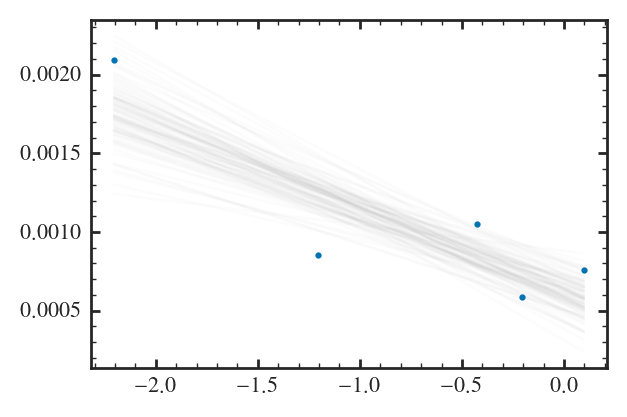

In [39]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:16<00:00, 178.96it/s]


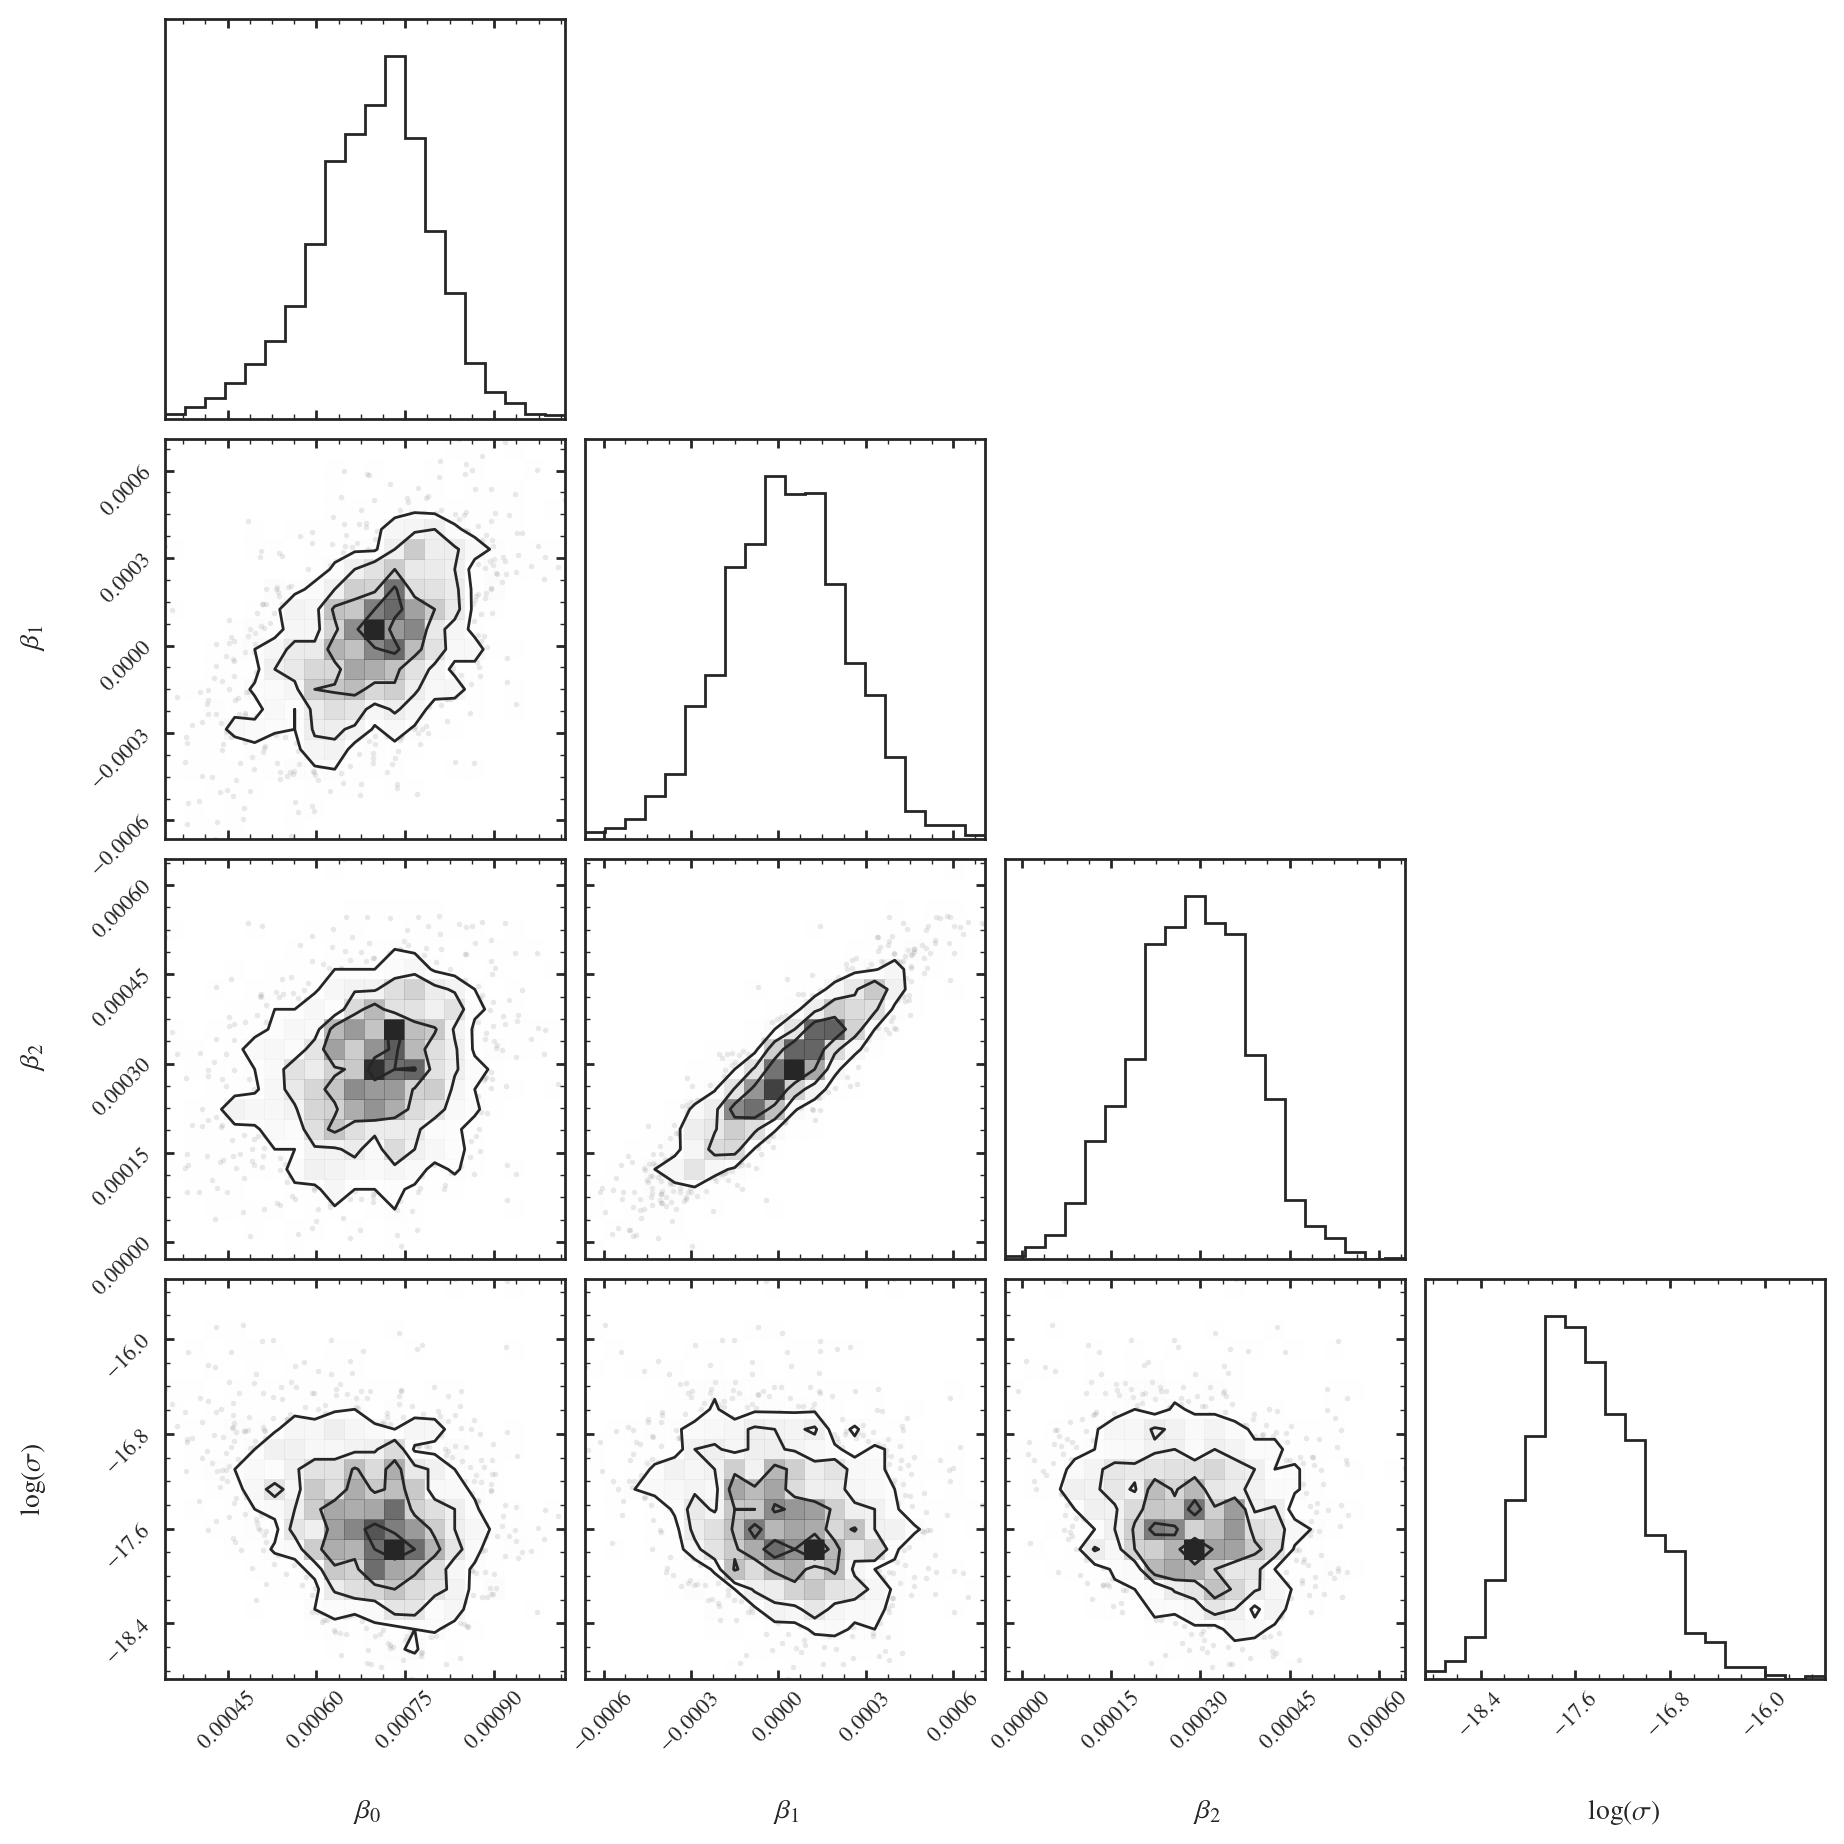

In [40]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 6.99e-04 + 1.05e-04 - 8.73e-05
$\beta_1$ = 2.50e-05 + 2.09e-04 - 2.07e-04
$\beta_2$ = 2.87e-04 + 1.01e-04 - 9.47e-05
$\log(\sigma)$ = -1.75e+01 + 4.35e-01 - 5.18e-01


(-0.0003, 0.003)

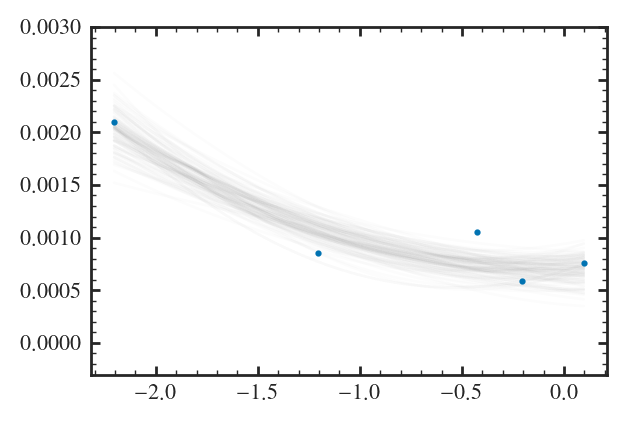

In [41]:
mcmc_utils.plot_posterior(quad_model, obs, samples)
plt.ylim(-0.3e-3, 3e-3)

100%|██████████| 3000/3000 [00:13<00:00, 227.27it/s]


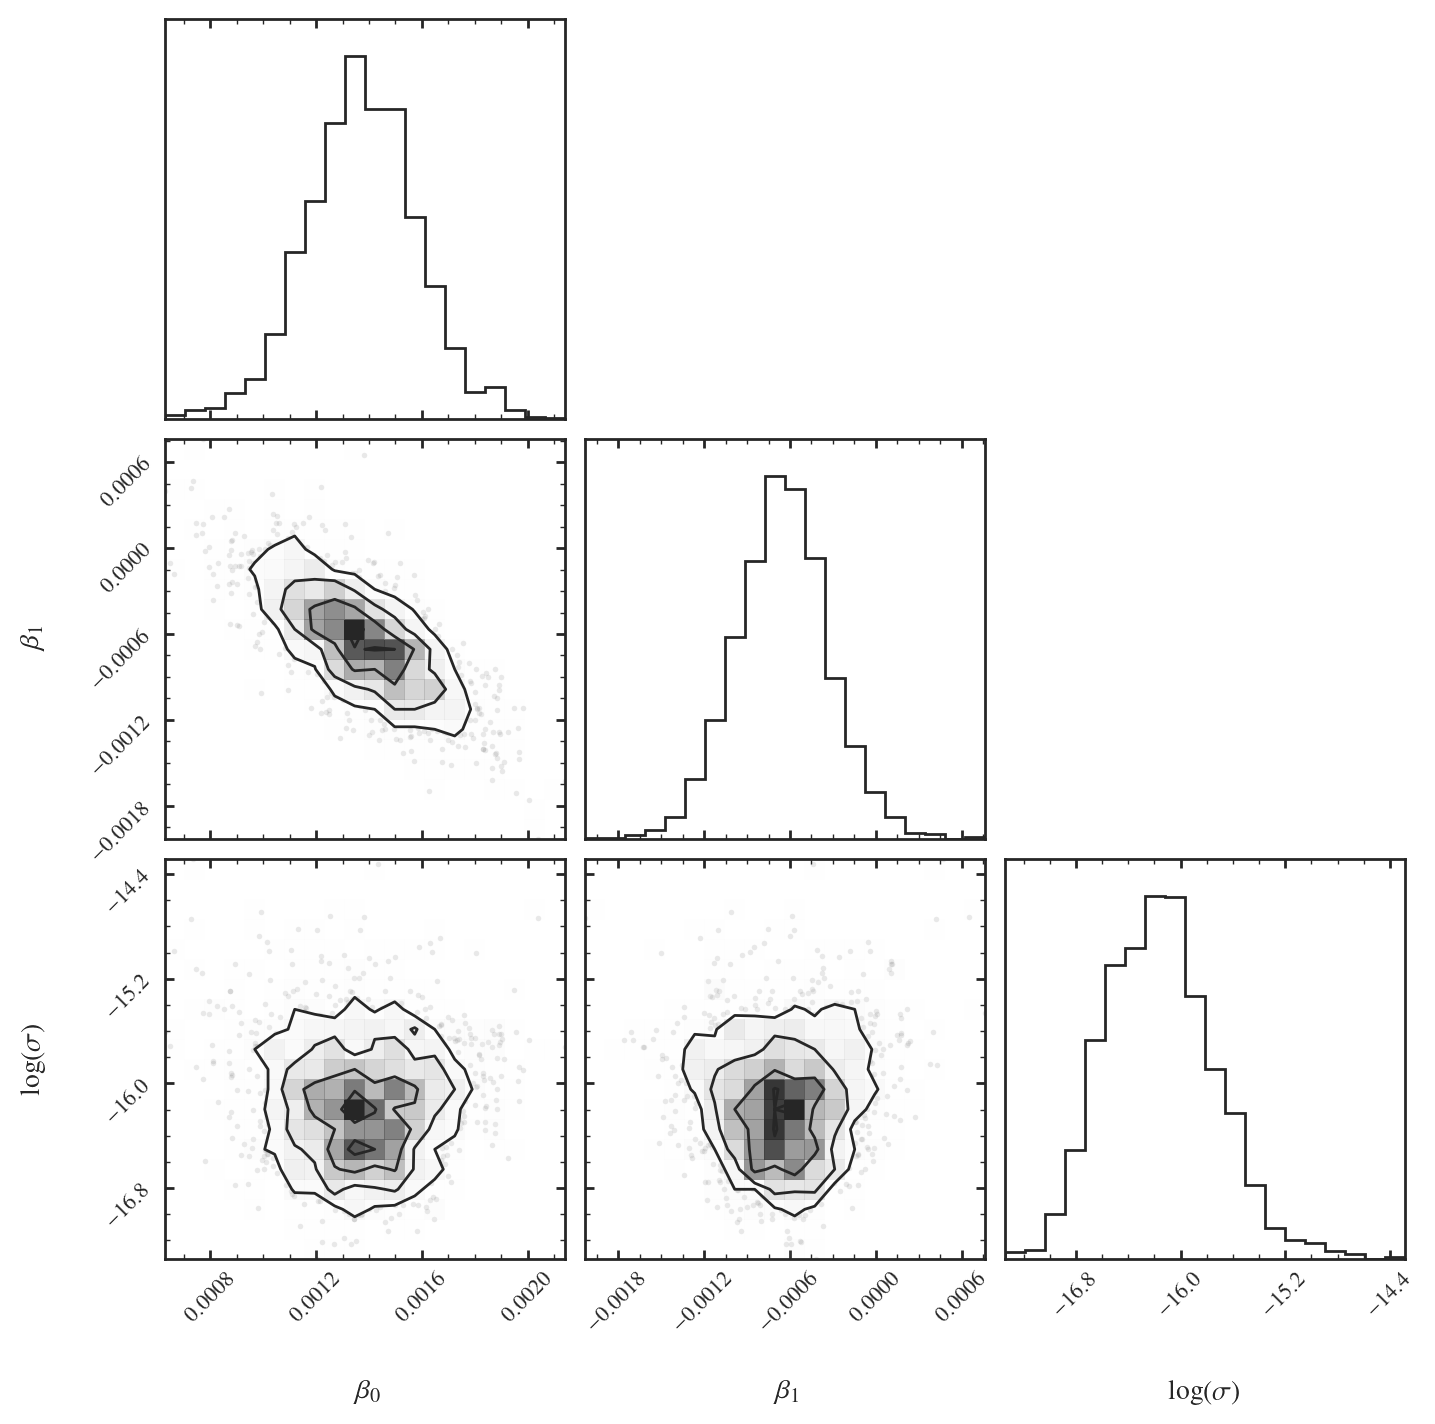

In [42]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 1.37e-03 + 2.01e-04 - 1.99e-04
$\beta_1$ = -6.54e-04 + 3.15e-04 - 3.08e-04
$\log(\sigma)$ = -1.62e+01 + 4.00e-01 - 4.41e-01


(-0.0003, 0.003)

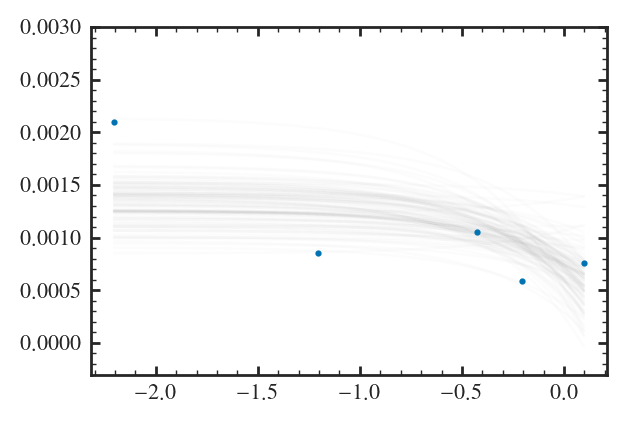

In [43]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-0.3e-3, 3e-3)

In [44]:
obs = get_yield_table("pignatari16")
obs = (obs[0][1:], obs[1][1:], None, None)

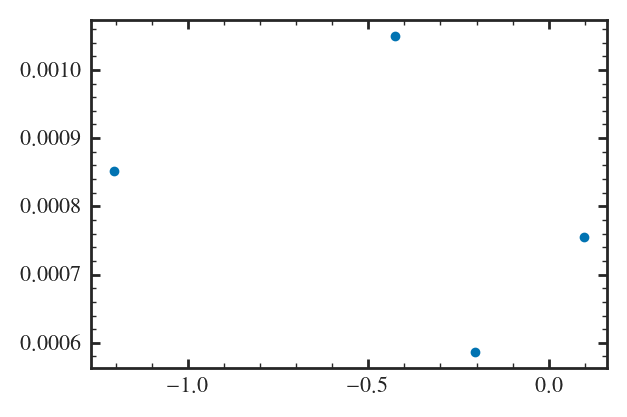

In [45]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:13<00:00, 223.83it/s]


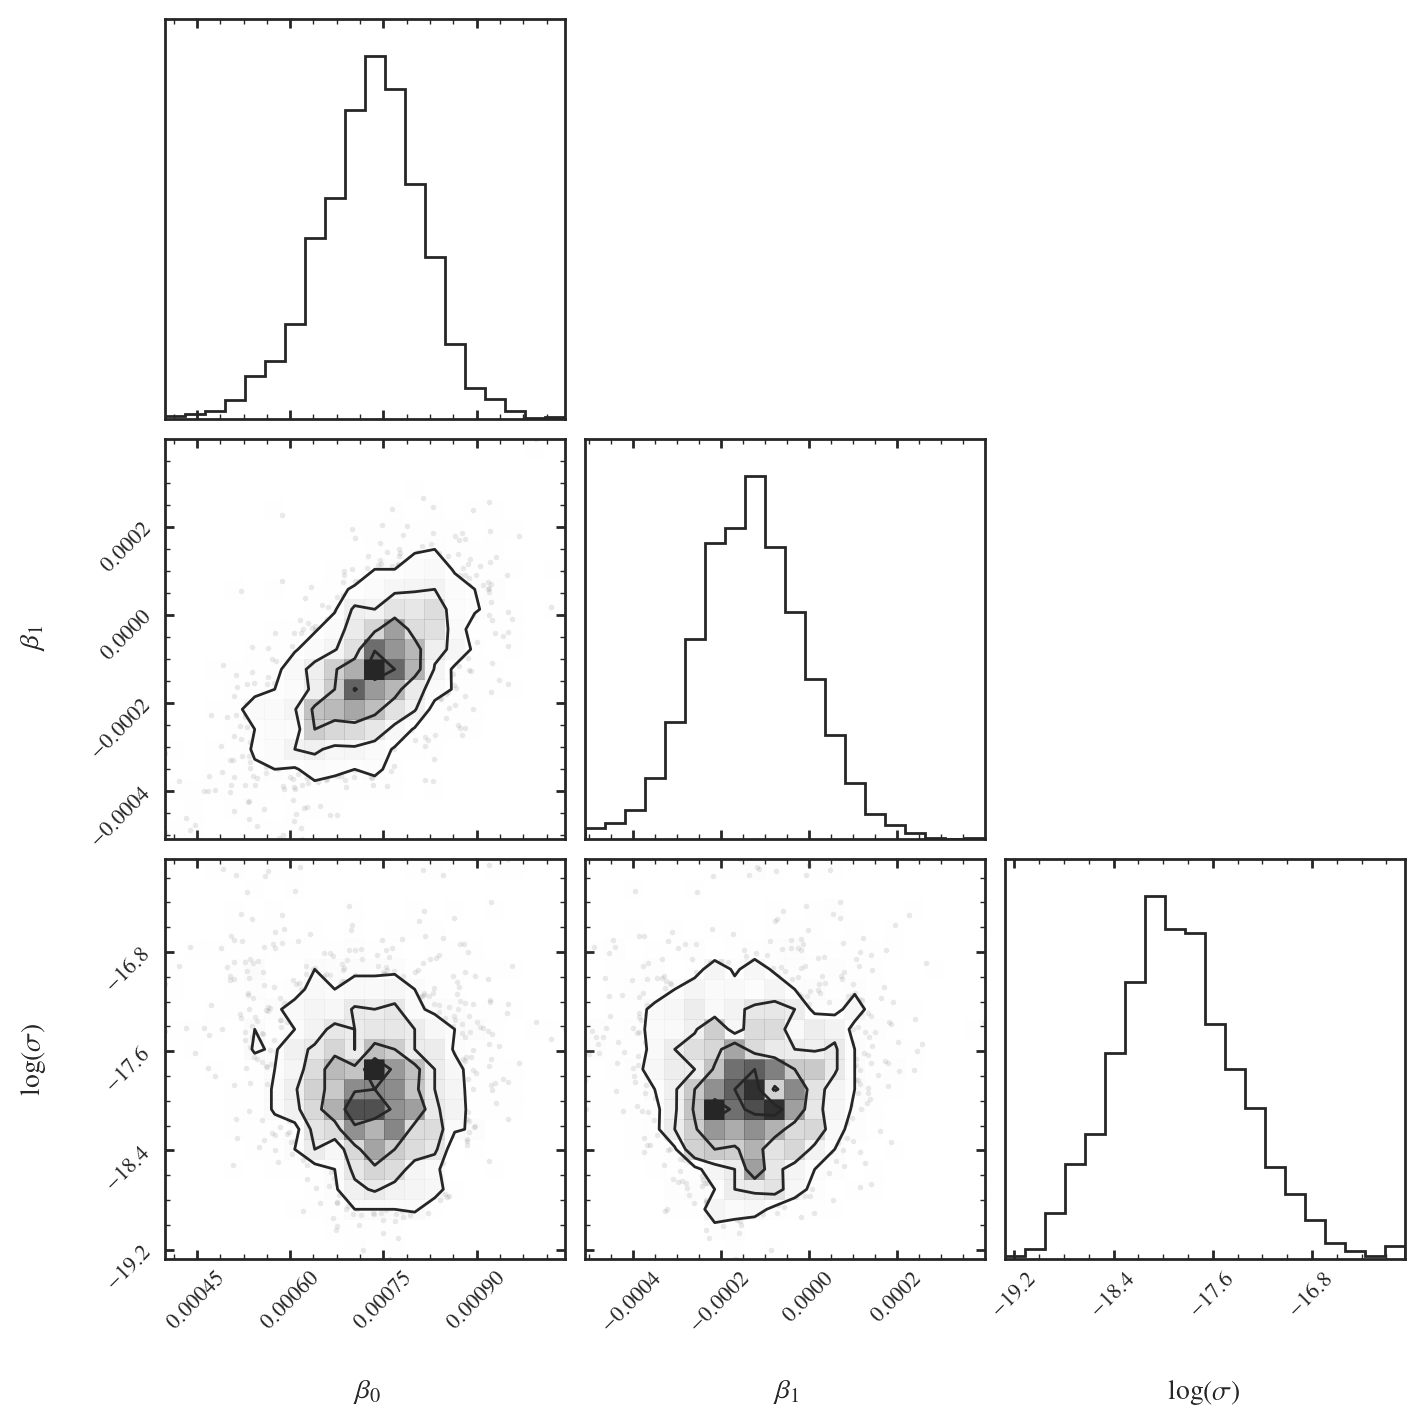

In [46]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 7.34e-04 + 8.93e-05 - 7.62e-05
$\beta_1$ = -1.35e-04 + 1.17e-04 - 1.26e-04
$\log(\sigma)$ = -1.79e+01 + 4.48e-01 - 5.35e-01


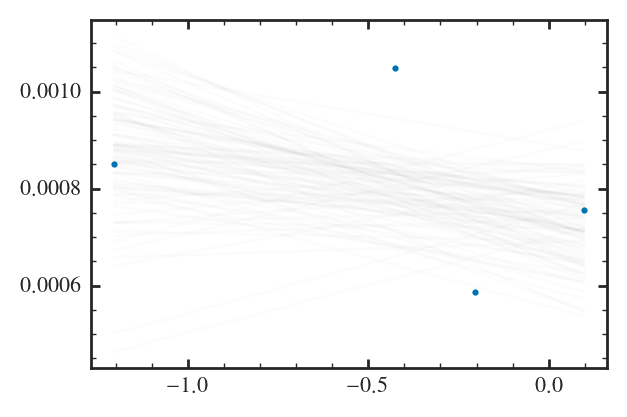

In [47]:
mcmc_utils.plot_posterior(lin_model, obs, samples)